In [2]:
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import scipy.interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path
from scipy.optimize import curve_fit
import scipy.interpolate
import pandas as pd
import plotly.validators.scatter.marker


def irrep_list_maker(energy_file):
    df = pd.read_csv(energy_file,delim_whitespace=True, header=None)
    dflist = df.values.tolist()
    irrep_list = []
    for i in range(len(dflist)):
        irrep = dflist[i][1]
    
        if len(irrep_list)==0:
            irrep_list.append(irrep)
        else:
            check_irrep_list_flag = 0
            for j in range(len(irrep_list)):
                temp_irrep = irrep_list[j]
            
                if(temp_irrep == irrep):
                    check_irrep_list_flag = 1
                    break 
            if(check_irrep_list_flag==0):
                irrep_list.append(irrep)

    return dflist, irrep_list 

def irrep_energy_list_maker(full_energy_list, fixed_irrep):
    Ecm_list = []
    Elat_list = []

    for i in range(len(full_energy_list)):
        if(full_energy_list[i][1]==fixed_irrep):
            Ecm_list.append(float(full_energy_list[i][2]))
            Elat_list.append(float(full_energy_list[i][3]))

    return Ecm_list, Elat_list 

def energy_list_maker_fixedmom(full_energy_list, fixed_mom):
    Ecm_list = []
    Elat_list = []


    for i in range(len(full_energy_list)):
        if(full_energy_list[i][1][0]==fixed_mom[0] and full_energy_list[i][1][1]==fixed_mom[1] and full_energy_list[i][1][2]==fixed_mom[2]):
            Ecm_list.append(float(full_energy_list[i][2]))
            Elat_list.append(float(full_energy_list[i][3]))

    return Ecm_list, Elat_list 



This section is for testing $F_2$ for identical particles

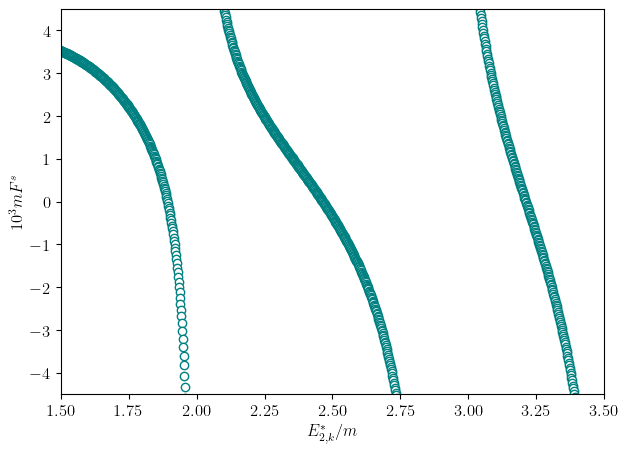

In [2]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "F2_i1_test.dat"
k2file = "K2file.dat"
(E2star, ReF, ImF) = np.genfromtxt(filename, unpack=True)
(E2, ReK, ImK) = np.genfromtxt(k2file,unpack=True)
fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlim(1.5,3.5)
ax.set_ylim(-4.5,4.5)
ax.set_ylabel("$10^3 m F^s$")
ax.set_xlabel("$E_{2,k}^*/m$")
#print(ReF,ImF,E2star)
L = 6

ax.scatter(E2star, 0.5*ReF*(10**3)*L*L*L, marker='o', edgecolor="teal", facecolor='white')
#ax.plot(E2,10**3*ReK,color='black')
plt.draw()

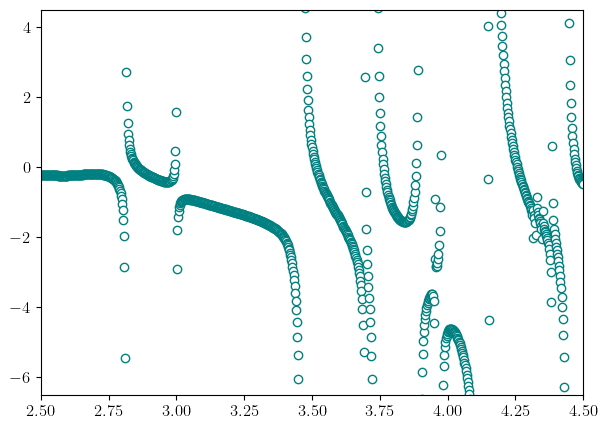

In [3]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "F3_ID_test.dat"

(En, ReQC3, ImQC3) = np.genfromtxt(filename, unpack=True)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlim(2.5,4.5)
ax.set_ylim(-6.5,4.5)

L = 6

ax.scatter(En, ReQC3*10**4, marker='o', edgecolor="teal", facecolor='white')
plt.draw()

In [4]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "F3_ID_test_1.dat"
raulF3file = "F3iso_data_from_Rauls_code"

(En, ReQC3, ImQC3) = np.genfromtxt(filename, unpack=True)
(En1, ReF3) = np.genfromtxt(raulF3file,unpack=True)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlabel("$E_3/m$", fontsize=25)
ax.set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
ax.set_xlim(2.5,4.5)
ax.set_ylim(-2.5,2.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

L = 6

ax.scatter(En, ReQC3*10**4, marker='o', edgecolor="teal", facecolor='white',zorder=5, label="non-degenerate mass code")
ax.scatter(En1+0.03, ReF3*10**4, marker='s', edgecolor="red", facecolor='white',zorder=3, label="degenerate mass code")
ax.legend()
fig.tight_layout()
#plt.draw()
outputfile_str = "F3_ID_test_1.pdf"
plt.savefig(outputfile_str)
plt.close()

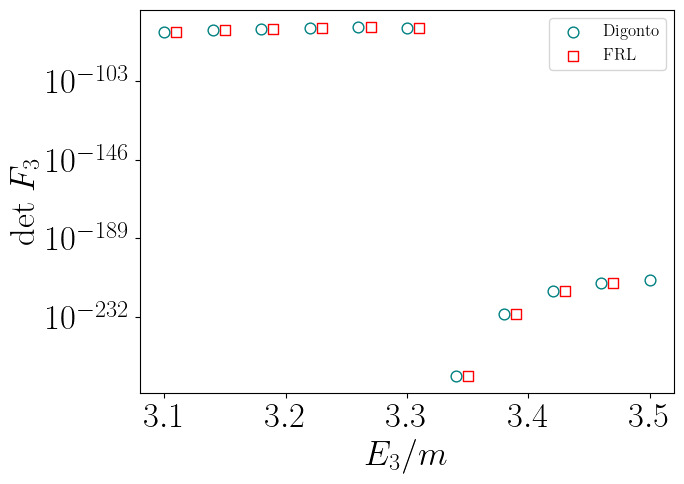

In [11]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "det_F3_test_L6.dat"
raulF3file = "detF3_test_FRL"

(En, detF3) = np.genfromtxt(filename, unpack=True)
(En1, detF31) = np.genfromtxt(raulF3file,unpack=True)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlabel("$E_3/m$", fontsize=25)
ax.set_ylabel("det $F_{3}$",fontsize=25)
#ax.set_xlim(2.5,4.5)
#ax.set_ylim(-2.5,2.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_yscale('log')
L = 6

ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
ax.scatter(En1+0.01, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
ax.legend()
fig.tight_layout()
plt.draw()
outputfile_str = "det_F3_2+1_test.pdf"
#plt.savefig(outputfile_str)
#plt.close()

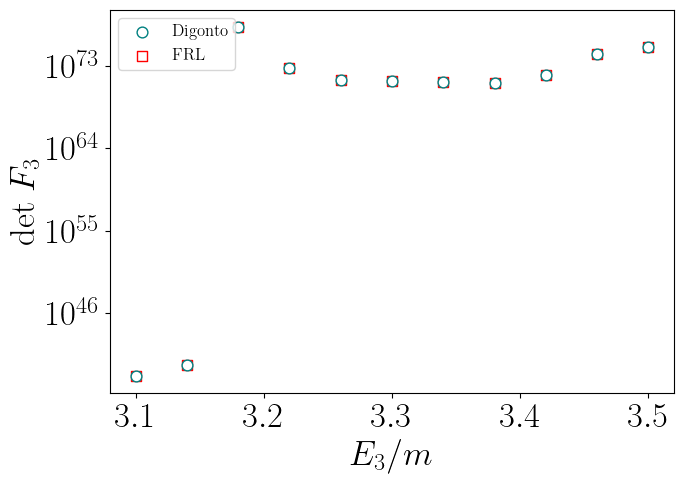

In [3]:
plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename = "det_F3inv_test_L5.dat"
raulF3file = "detF3inv_test_FRL_L5"

(En, detF3) = np.genfromtxt(filename, unpack=True)
(En1, detF31) = np.genfromtxt(raulF3file,unpack=True)

fig,ax = plt.subplots(figsize=(7,5))

ax.set_xlabel("$E_3/m$", fontsize=25)
ax.set_ylabel("det $F_{3}$",fontsize=25)
#ax.set_xlim(2.5,4.5)
#ax.set_ylim(-2.5,2.5)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)
ax.set_yscale('log')
L = 6

ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
ax.legend()
fig.tight_layout()
plt.draw()
outputfile_str = "det_F3_2+1_test.pdf"
#plt.savefig(outputfile_str)
#plt.close()

In [16]:
#This plots q^2 and sig_p^2 for different Ecm and P 

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "qsq_test_P000"
filename2 = "qsq_test_P100"
filename3 = "qsq_test_P110"
filename4 = "qsq_test_P111"
filename5 = "qsq_test_P200"

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(7,25))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, Resigp, Imsigp, 
     Reqsq, Imqsq, Recutoff, Imcutoff, 
     Recheckzero1, Imcheckzero1,Recheckzero2,
     Imcheckzero2, threshold) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax.set_xlim(2.5,4.5)
    ax[counter].set_ylim(-2.5,2.5)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,Resigp, linewidth=3, label="$\sigma_p$")
    ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    counter=counter+1
    ax[4].set_xlabel("$E_{cm}$", fontsize=25)
    plt.draw()

outputfile_str = "qsq_test_m1_1_m2_0.5.pdf"
plt.savefig(outputfile_str)
plt.close()

file loaded =  qsq_test_P000
file loaded =  qsq_test_P100
file loaded =  qsq_test_P110
file loaded =  qsq_test_P111
file loaded =  qsq_test_P200


In [4]:
#This plots q^2 and sig_p^2 for different Ecm and P, the masses are KKpi

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "qsq_test_KKpi_P000"
filename2 = "qsq_test_KKpi_P100"
filename3 = "qsq_test_KKpi_P110"
filename4 = "qsq_test_KKpi_P111"
filename5 = "qsq_test_KKpi_P200"

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(7,25))
counter = 0
fig.suptitle("Two-body sub-system, $\pi K$", fontsize=20)
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, Resigp, Imsigp, 
     Reqsq, Imqsq, Recutoff, Imcutoff, 
     Recheckzero1, Imcheckzero1,Recheckzero2,
     Imcheckzero2, threshold) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[counter].set_ylim(-0.05,0.05)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,Resigp, linewidth=3, label="$\sigma_p$")
    ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    counter=counter+1
    ax[4].set_xlabel("$E_{cm}$", fontsize=25)
    plt.draw()

outputfile_str = "qsq_test_KKpi_2body_piK.pdf"
plt.savefig(outputfile_str)
plt.close()

file loaded =  qsq_test_KKpi_P000
file loaded =  qsq_test_KKpi_P100
file loaded =  qsq_test_KKpi_P110
file loaded =  qsq_test_KKpi_P111
file loaded =  qsq_test_KKpi_P200


In [3]:
#This plots q^2 and sig_p^2 for different Ecm and P, the masses are KKpi

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "qsq_test_KKpi_2body_KK_P000"
filename2 = "qsq_test_KKpi_2body_KK_P100"
filename3 = "qsq_test_KKpi_2body_KK_P110"
filename4 = "qsq_test_KKpi_2body_KK_P111"
filename5 = "qsq_test_KKpi_2body_KK_P200"

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(7,25))
counter = 0
fig.suptitle("Two-body sub-system, $\pi K$", fontsize=20)
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, Resigp, Imsigp, 
     Reqsq, Imqsq, Recutoff, Imcutoff, 
     Recheckzero1, Imcheckzero1,Recheckzero2,
     Imcheckzero2, threshold) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[counter].set_ylim(-0.05,0.05)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,Resigp, linewidth=3, label="$\sigma_p$")
    ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    counter=counter+1
    ax[4].set_xlabel("$E_{cm}$", fontsize=25)
    plt.draw()

outputfile_str = "qsq_test_KKpi_2body_KK.pdf"
plt.savefig(outputfile_str)
plt.close()

file loaded =  qsq_test_KKpi_2body_KK_P000
file loaded =  qsq_test_KKpi_2body_KK_P100
file loaded =  qsq_test_KKpi_2body_KK_P110
file loaded =  qsq_test_KKpi_2body_KK_P111
file loaded =  qsq_test_KKpi_2body_KK_P200


In [6]:
#This plots K3_iso for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "det_F3inv_KKpi_L20_nP_000.dat"
filename2 = "det_F3inv_KKpi_L20_nP_100.dat"
filename3 = "det_F3inv_KKpi_L20_nP_110.dat"
filename4 = "det_F3inv_KKpi_L20_nP_111.dat"
filename5 = "det_F3inv_KKpi_L20_nP_200.dat"

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, K3df) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax.set_ylim(-1E7,1E7)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    #ax[counter].set_title(titlestring)
    ax.plot(EcmR,K3df, linewidth=3, label=titlestring)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax.axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax.legend()
    fig.tight_layout()
    counter=counter+1
    ax.set_xlabel("$E_{cm}$", fontsize=25)
    ax.set_ylabel("$\mathcal{K}_{3,iso}$",fontsize=25)
    plt.draw()

outputfile_str = "K3df_KKpi_test.pdf"
plt.savefig(outputfile_str)
plt.close()

file loaded =  det_F3inv_KKpi_L20_nP_000.dat
file loaded =  det_F3inv_KKpi_L20_nP_100.dat
file loaded =  det_F3inv_KKpi_L20_nP_110.dat
file loaded =  det_F3inv_KKpi_L20_nP_111.dat
file loaded =  det_F3inv_KKpi_L20_nP_200.dat


file loaded =  F2_vs_sigp_2body_piK_P000_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_piK_P100_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_piK_P110_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_piK_P111_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_piK_P200_En_2.900000.dat


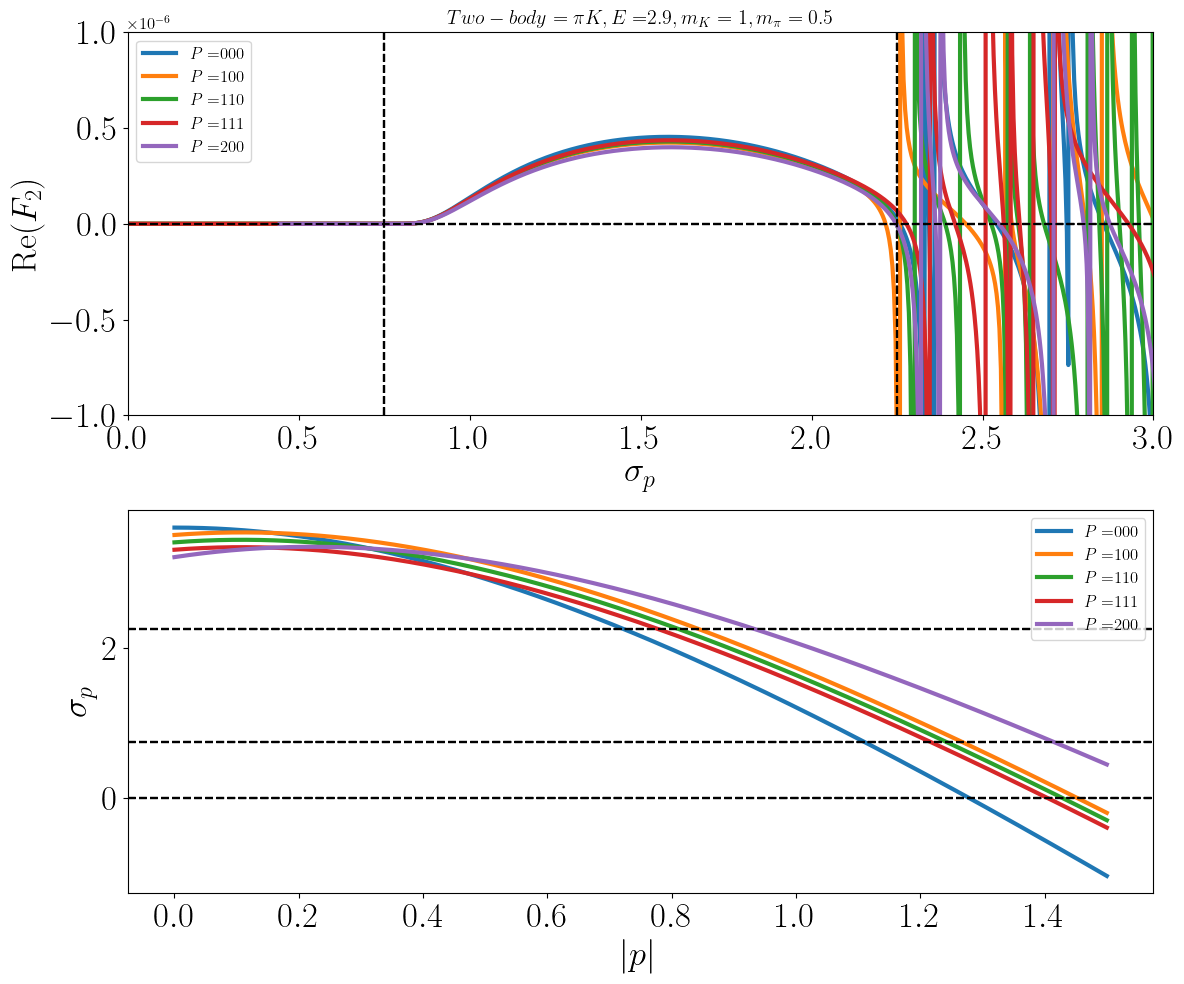

In [8]:
#This plots F2 for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_vs_sigp_2body_piK_P000_En_2.900000.dat"
filename2 = "F2_vs_sigp_2body_piK_P100_En_2.900000.dat"
filename3 = "F2_vs_sigp_2body_piK_P110_En_2.900000.dat"
filename4 = "F2_vs_sigp_2body_piK_P111_En_2.900000.dat"
filename5 = "F2_vs_sigp_2body_piK_P200_En_2.900000.dat"

#filelist = [filename1]
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, ind, nsq, tcut, twobody_threshold, re_spec_p, im_spec_p, 
     re_sigp, im_sigp, reF2, imF2) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[0].set_xlim(0,3)
    ax[0].set_ylim(-1E-6,1E-6)
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax[1].set_xlim(0,3)
    #ax[1].set_ylim(-1E-6,1E-6)
    ax[1].tick_params(axis='both', which='major', labelsize=25)
    ax[1].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[0].set_title("$Two-body = \pi K, E = $" + str(En[0])+ "$, m_K = 1, m_\pi = 0.5$")
    ax[0].plot(re_sigp,reF2, linewidth=3, label=titlestring)
    ax[1].plot(re_spec_p,re_sigp, linewidth=3, label=titlestring)
    
    #ax.scatter(re_sigp, reF2, marker='o', s=60,zorder=5, label=titlestring)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[0].axhline(y=0,linestyle='--',color='black')
    ax[0].axvline(x=tcut[0],linestyle='--',color='black')
    ax[0].axvline(x=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    ax[1].axhline(y=0,linestyle='--',color='black')
    ax[1].axhline(y=tcut[0],linestyle='--',color='black')
    ax[1].axhline(y=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    ax[0].set_xlabel("$\sigma_{p}$", fontsize=25)
    ax[0].set_ylabel("Re($F_{2}$)",fontsize=25)
    ax[1].set_ylabel("$\sigma_p$",fontsize=25)
    ax[1].set_xlabel("$|p|$", fontsize=25)
    
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    counter=counter+1
    
    plt.draw()

outputfile_str = "F2_2body_piK" + str(En[0]) + "_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F2_vs_sigp_2body_KK_P000_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_KK_P100_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_KK_P110_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_KK_P111_En_2.900000.dat
file loaded =  F2_vs_sigp_2body_KK_P200_En_2.900000.dat


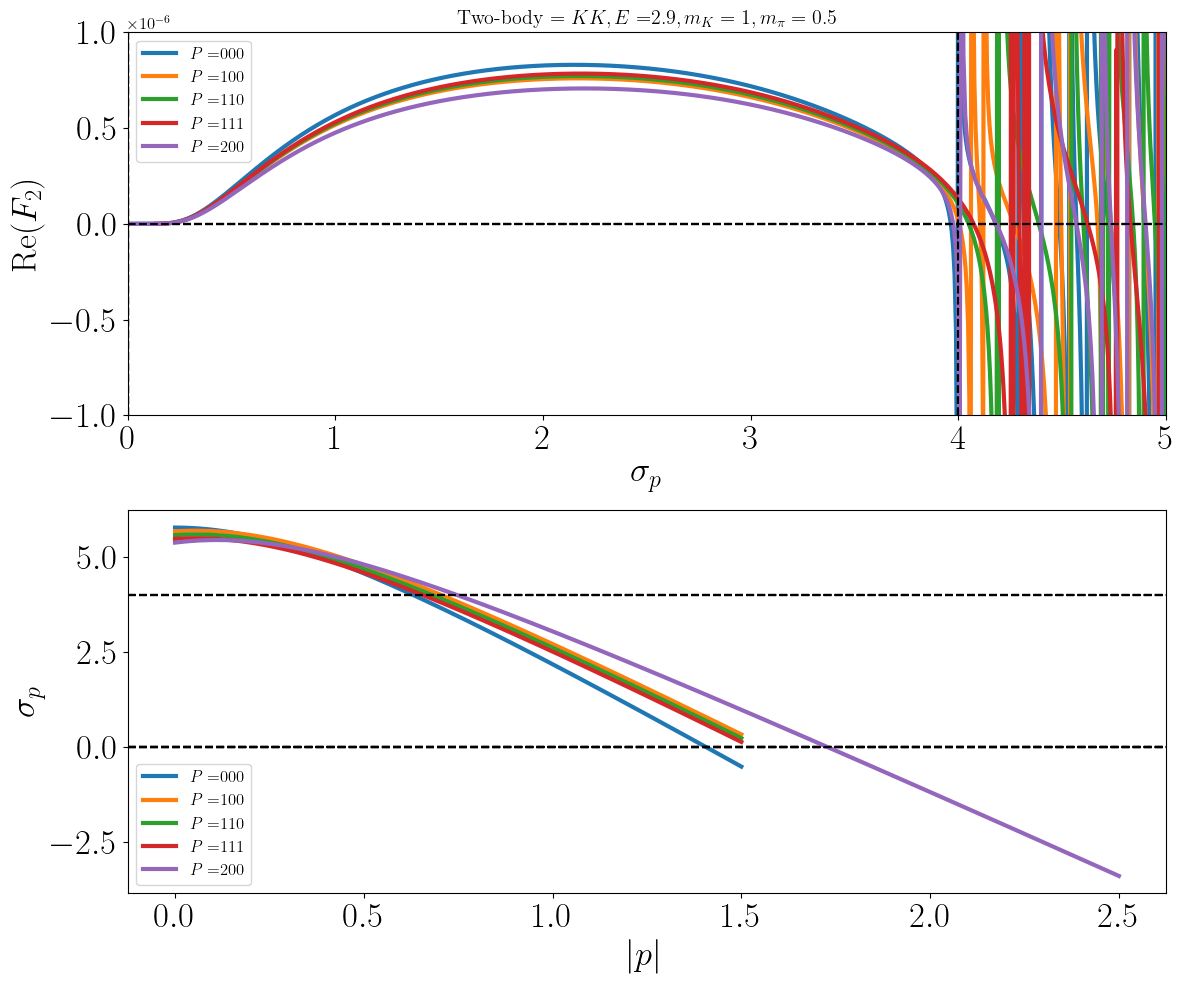

In [6]:
#This plots F2 for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_vs_sigp_2body_KK_P000_En_2.900000.dat"
filename2 = "F2_vs_sigp_2body_KK_P100_En_2.900000.dat"
filename3 = "F2_vs_sigp_2body_KK_P110_En_2.900000.dat"
filename4 = "F2_vs_sigp_2body_KK_P111_En_2.900000.dat"
filename5 = "F2_vs_sigp_2body_KK_P200_En_2.900000.dat"

#filelist = [filename1]
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, ind, nsq, tcut, twobody_threshold, re_spec_p, im_spec_p, 
     re_sigp, im_sigp, reF2, imF2) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[0].set_xlim(0,5)
    ax[0].set_ylim(-1E-6,1E-6)
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax[1].set_xlim(0,5)
    #ax[1].set_ylim(-1E-9,1E-9)
    ax[1].tick_params(axis='both', which='major', labelsize=25)
    ax[1].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[0].set_title("Two-body $= K K, E = $" + str(En[0]) + "$, m_K = 1, m_\pi = 0.5$")
    ax[0].plot(re_sigp,reF2, linewidth=3, label=titlestring)
    ax[1].plot(re_spec_p,re_sigp, linewidth=3, label=titlestring)
    
    #ax.scatter(re_sigp, reF2, marker='o', s=60,zorder=5, label=titlestring)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[0].axhline(y=0,linestyle='--',color='black')
    ax[0].axvline(x=tcut[0],linestyle='--',color='black')
    ax[0].axvline(x=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    ax[1].axhline(y=0,linestyle='--',color='black')
    ax[1].axhline(y=tcut[0],linestyle='--',color='black')
    ax[1].axhline(y=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    ax[0].set_xlabel("$\sigma_{p}$", fontsize=25)
    ax[0].set_ylabel("Re($F_{2}$)",fontsize=25)
    ax[1].set_ylabel("$\sigma_p$",fontsize=25)
    ax[1].set_xlabel("$|p|$", fontsize=25)
    
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    counter=counter+1
    
    plt.draw()

outputfile_str = "F2_2body_KK" + str(En[0]) + "_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F2_vs_sigp_KKpi_2body_KK_P000_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_KK_P100_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_KK_P110_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_KK_P111_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_KK_P200_Ecm_0.338020.dat


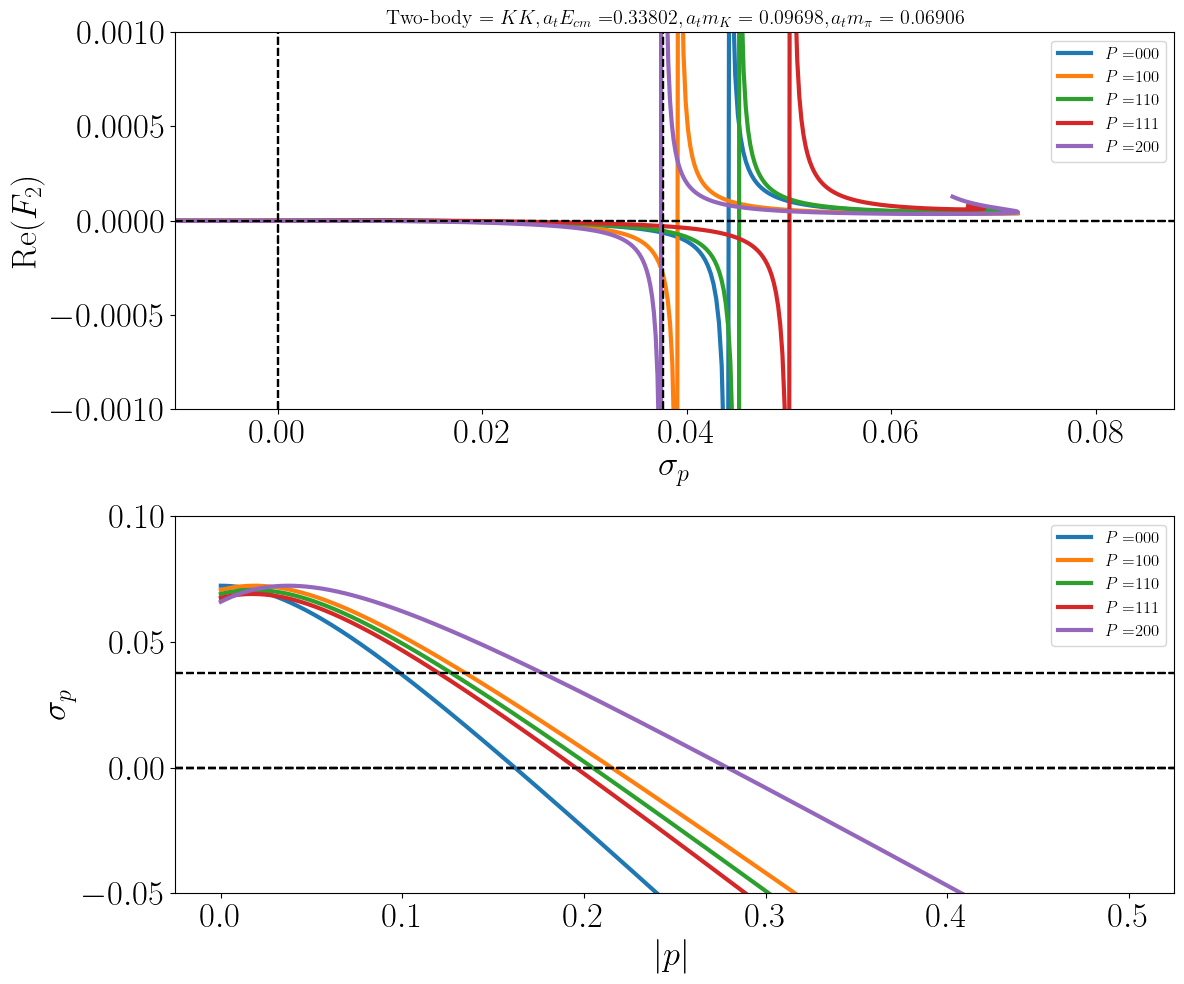

In [10]:
#This plots F2 for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_vs_sigp_KKpi_2body_KK_P000_Ecm_0.338020.dat"
filename2 = "F2_vs_sigp_KKpi_2body_KK_P100_Ecm_0.338020.dat"
filename3 = "F2_vs_sigp_KKpi_2body_KK_P110_Ecm_0.338020.dat"
filename4 = "F2_vs_sigp_KKpi_2body_KK_P111_Ecm_0.338020.dat"
filename5 = "F2_vs_sigp_KKpi_2body_KK_P200_Ecm_0.338020.dat"

#filelist = [filename1,filename2,filename3]
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, Ecm, ind, nsq, tcut, twobody_threshold, re_spec_p, im_spec_p, 
     re_sigp, im_sigp, reF2, imF2) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[0].set_xlim(-0.01,twobody_threshold[0]*twobody_threshold[0]+0.05)
    ax[0].set_ylim(-1E-3,1E-3)
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax[1].set_xlim(-0.01,twobody_threshold[0]*twobody_threshold[0]+0.05)
    ax[1].set_ylim(-0.05,0.1)
    ax[1].tick_params(axis='both', which='major', labelsize=25)
    ax[1].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[0].set_title("Two-body $= K K, a_t E_{cm} = $" + str(Ecm[0]) + "$, a_t m_K = 0.09698, a_t m_\pi = 0.06906$")
    ax[0].plot(re_sigp,reF2, linewidth=3, label=titlestring)
    #ax[1].plot(re_sigp,imF2, linewidth=3, label=titlestring)
    ax[1].plot(re_spec_p,re_sigp, linewidth=3, label=titlestring)
    
    #ax.scatter(re_sigp, reF2, marker='o', s=60,zorder=5, label=titlestring)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[0].axhline(y=0,linestyle='--',color='black')
    ax[0].axvline(x=tcut[0],linestyle='--',color='black')
    ax[0].axvline(x=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    ax[1].axhline(y=0,linestyle='--',color='black')
    ax[1].axhline(y=tcut[0],linestyle='--',color='black')
    ax[1].axhline(y=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    ax[0].set_xlabel("$\sigma_{p}$", fontsize=25)
    ax[0].set_ylabel("Re($F_{2}$)",fontsize=25)
    ax[1].set_ylabel("$\sigma_p$",fontsize=25)
    ax[1].set_xlabel("$|p|$", fontsize=25)
    
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    counter=counter+1
    
    plt.draw()

outputfile_str = "F2_KKpi_2body_KK" + str(Ecm[0]) + "_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F2_vs_sigp_KKpi_2body_piK_P000_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_piK_P100_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_piK_P110_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_piK_P111_Ecm_0.338020.dat
file loaded =  F2_vs_sigp_KKpi_2body_piK_P200_Ecm_0.338020.dat


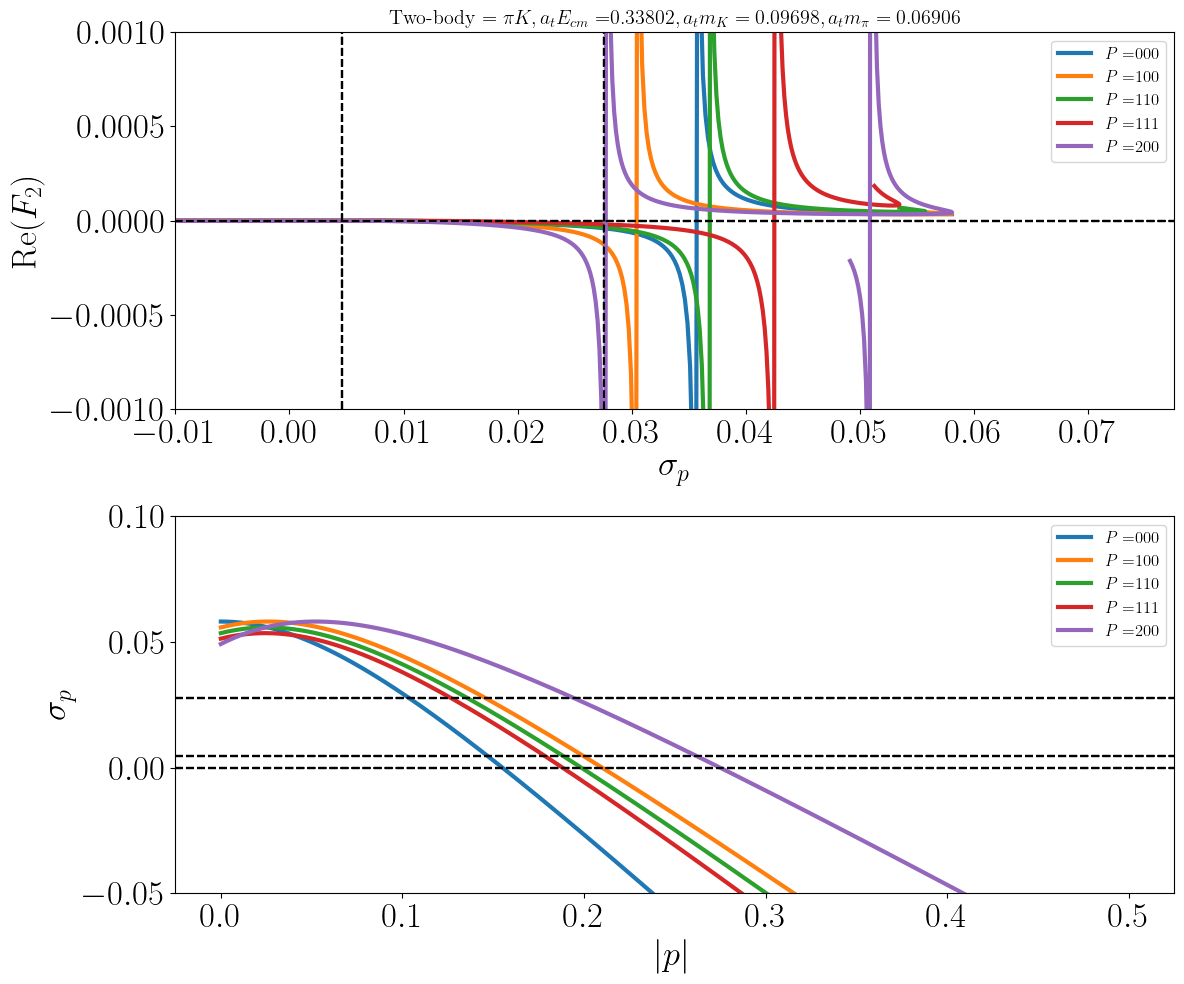

In [12]:
#This plots F2 for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_vs_sigp_KKpi_2body_piK_P000_Ecm_0.338020.dat"
filename2 = "F2_vs_sigp_KKpi_2body_piK_P100_Ecm_0.338020.dat"
filename3 = "F2_vs_sigp_KKpi_2body_piK_P110_Ecm_0.338020.dat"
filename4 = "F2_vs_sigp_KKpi_2body_piK_P111_Ecm_0.338020.dat"
filename5 = "F2_vs_sigp_KKpi_2body_piK_P200_Ecm_0.338020.dat"

#filelist = [filename1,filename2,filename3]
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, Ecm, ind, nsq, tcut, twobody_threshold, re_spec_p, im_spec_p, 
     re_sigp, im_sigp, reF2, imF2) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[0].set_xlim(-0.01,twobody_threshold[0]*twobody_threshold[0]+0.05)
    ax[0].set_ylim(-1E-3,1E-3)
    ax[0].tick_params(axis='both', which='major', labelsize=25)
    ax[0].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax[1].set_xlim(-0.01,twobody_threshold[0]*twobody_threshold[0]+0.05)
    ax[1].set_ylim(-0.05,0.1)
    ax[1].tick_params(axis='both', which='major', labelsize=25)
    ax[1].tick_params(axis='both', which='minor', labelsize=25)
    
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[0].set_title("Two-body $= \pi K, a_t E_{cm} = $" + str(Ecm[0]) + "$, a_t m_K = 0.09698, a_t m_\pi = 0.06906$")
    ax[0].plot(re_sigp,reF2, linewidth=3, label=titlestring)
    #ax[1].plot(re_sigp,imF2, linewidth=3, label=titlestring)
    ax[1].plot(re_spec_p,re_sigp, linewidth=3, label=titlestring)
    
    #ax.scatter(re_sigp, reF2, marker='o', s=60,zorder=5, label=titlestring)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[0].axhline(y=0,linestyle='--',color='black')
    ax[0].axvline(x=tcut[0],linestyle='--',color='black')
    ax[0].axvline(x=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    ax[1].axhline(y=0,linestyle='--',color='black')
    ax[1].axhline(y=tcut[0],linestyle='--',color='black')
    ax[1].axhline(y=twobody_threshold[0]*twobody_threshold[0],linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    ax[0].set_xlabel("$\sigma_{p}$", fontsize=25)
    ax[0].set_ylabel("Re($F_{2}$)",fontsize=25)
    ax[1].set_ylabel("$\sigma_p$",fontsize=25)
    ax[1].set_xlabel("$|p|$", fontsize=25)
    
    ax[0].legend()
    ax[1].legend()
    fig.tight_layout()
    counter=counter+1
    
    plt.draw()

outputfile_str = "F2_KKpi_2body_piK" + str(Ecm[0]) + "_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F3_KKpi_L20_nP_000.dat
file loaded =  F3_KKpi_L20_nP_100.dat
file loaded =  F3_KKpi_L20_nP_110.dat
file loaded =  F3_KKpi_L20_nP_111.dat
file loaded =  F3_KKpi_L20_nP_200.dat


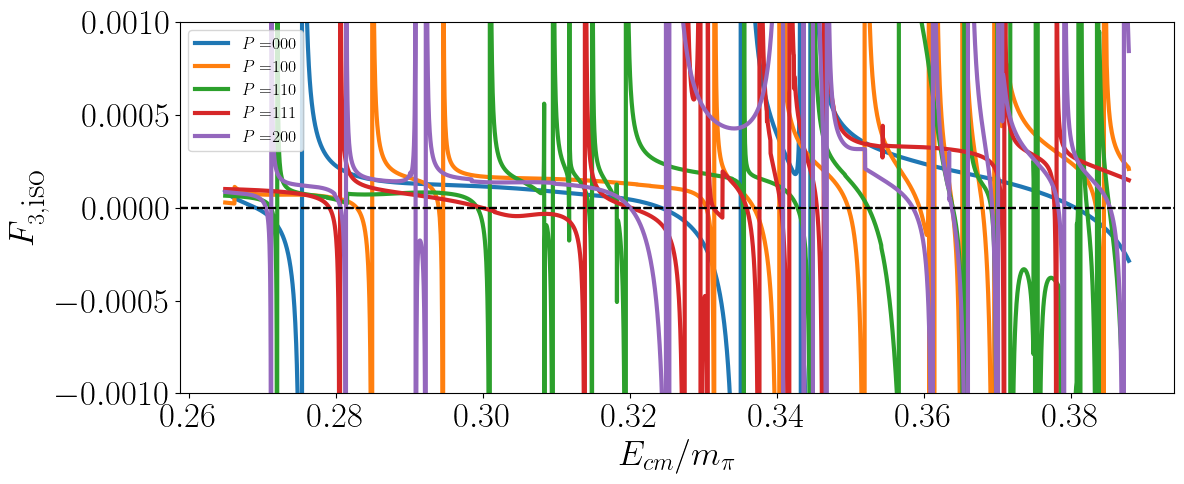

In [14]:
#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax.set_ylim(-1E-3,1E-3)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    #ax[counter].set_title(titlestring)
    ax.plot(EcmR,F3iso, linewidth=3, label=titlestring)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax.axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax.legend()
    fig.tight_layout()
    counter=counter+1
    ax.set_xlabel("$E_{cm}/m_\pi$", fontsize=25)
    ax.set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()

outputfile_str = "F3iso_KKpi_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F2_sum_test_P100.dat


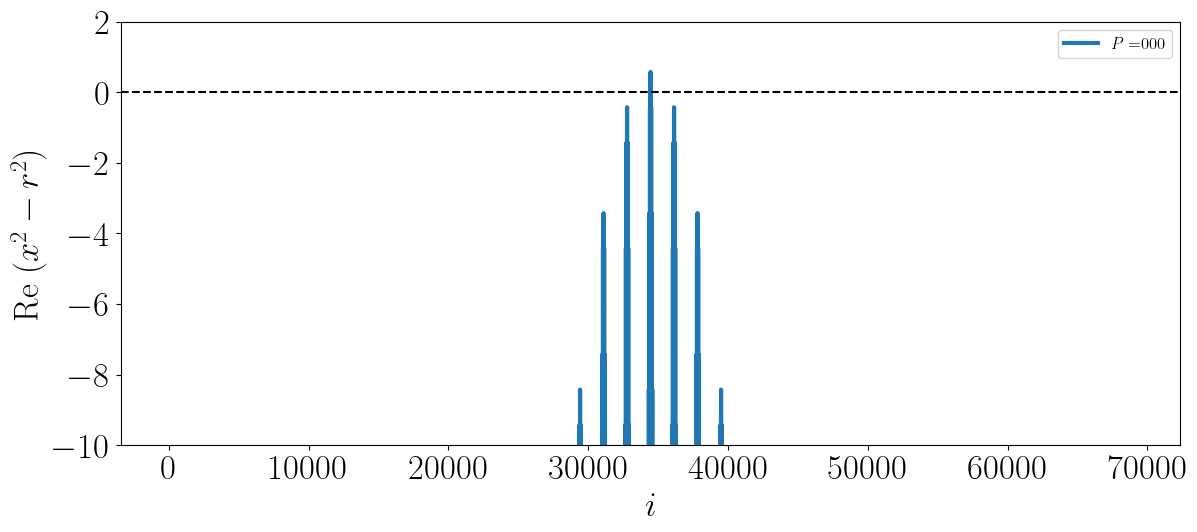

In [10]:
#This plots x^2-r^2 (found inside F2 sum) for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F2_sum_test_P100.dat"
filename2 = "F2_sum_test_P100.dat"
filename3 = "F2_sum_test_P100.dat"
filename4 = "F2_sum_test_P100.dat"
filename5 = "F2_sum_test_P100.dat"

atmpi = 0.06906

#filelist = [filename1, filename2, filename3, filename4, filename5]
filelist = [filename1]

titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (countr, nasq, rexsq, imxsq, rersq, 
     imrsq, rexsqrsq, imxsqrsq) = np.genfromtxt(filename, unpack=True)



    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax.set_xlim(3.75E6,4.50E6)
    ax.set_ylim(-10,2)
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    #ax[counter].set_title(titlestring)
    ax.plot(countr,rexsqrsq, linewidth=3, label=titlestring)
    #ax.plot(countr,nasq, linewidth=3, label="$n^2$")
    #ax.plot(countr,rersq, linewidth=3, label="$r^2$")
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax.axhline(y=0,linestyle='--',color='black')
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax.legend()
    fig.tight_layout()
    counter=counter+1
    ax.set_xlabel("$i$", fontsize=25)
    ax.set_ylabel("Re $(x^2-r^2)$",fontsize=25)
    plt.draw()

outputfile_str = "F2_sum_test.pdf"
plt.savefig(outputfile_str)
#plt.close()

file loaded =  F3_KKpi_L20_nP_000.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_100.dat
E size =  18
file loaded =  F3_KKpi_L20_nP_110.dat
E size =  9
file loaded =  F3_KKpi_L20_nP_111.dat
E size =  10
file loaded =  F3_KKpi_L20_nP_200.dat
E size =  15
0


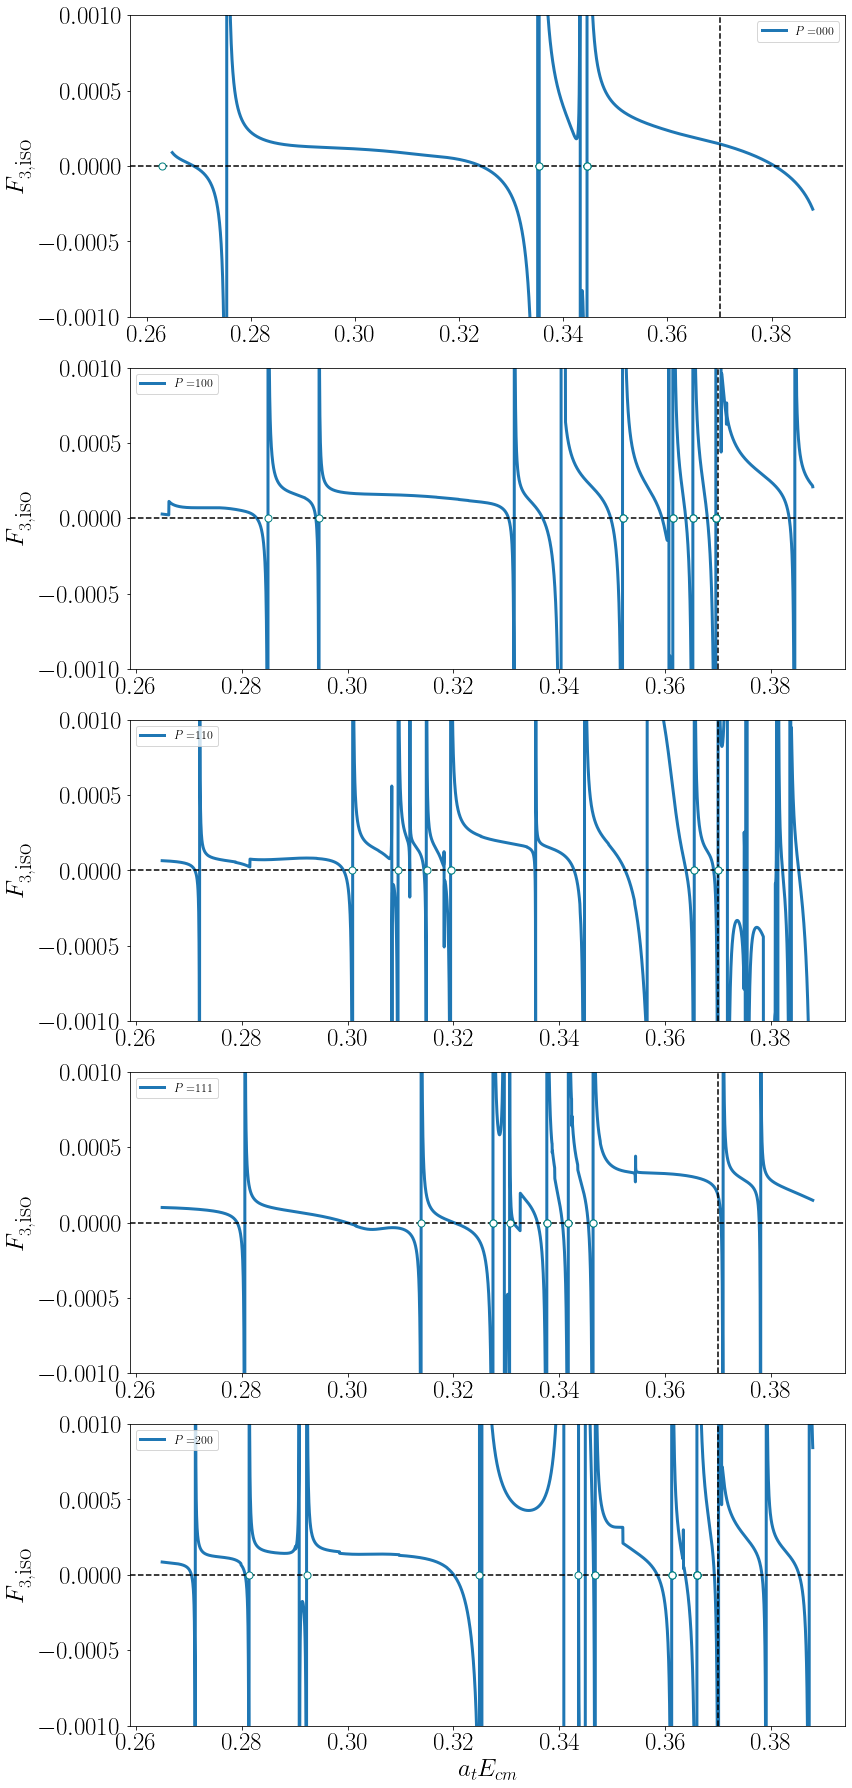

In [48]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from redstar (S2I2.energies)

#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]

for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)


    #non_int_energies_ecm, non_int_energies_elab = irrep_energy_list_maker(full_energy_list, selected_irrep_list[counter])
    non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])
    
    print("E size = ",len(non_int_energies_ecm))
    zero_y_val = []
    for i in range(len(non_int_energies_ecm)):
        zero_y_val.append(0.0)
    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[counter].set_ylim(-1E-3,1E-3)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    #ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,F3iso, linewidth=3, label=titlestring)
    ax[counter].scatter(non_int_energies_ecm,zero_y_val, marker='o', s=50, edgecolor="teal", facecolor='white',zorder=5)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$a_t E_{cm}$", fontsize=25)
    ax[counter].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F3iso_KKpi_test_freespectrum_comparison.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])

file loaded =  F3_KKpi_L20_nP_000.dat
E size =  3
file loaded =  F3_KKpi_L20_nP_100.dat
E size =  9
file loaded =  F3_KKpi_L20_nP_110.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_111.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_200.dat
E size =  8
0


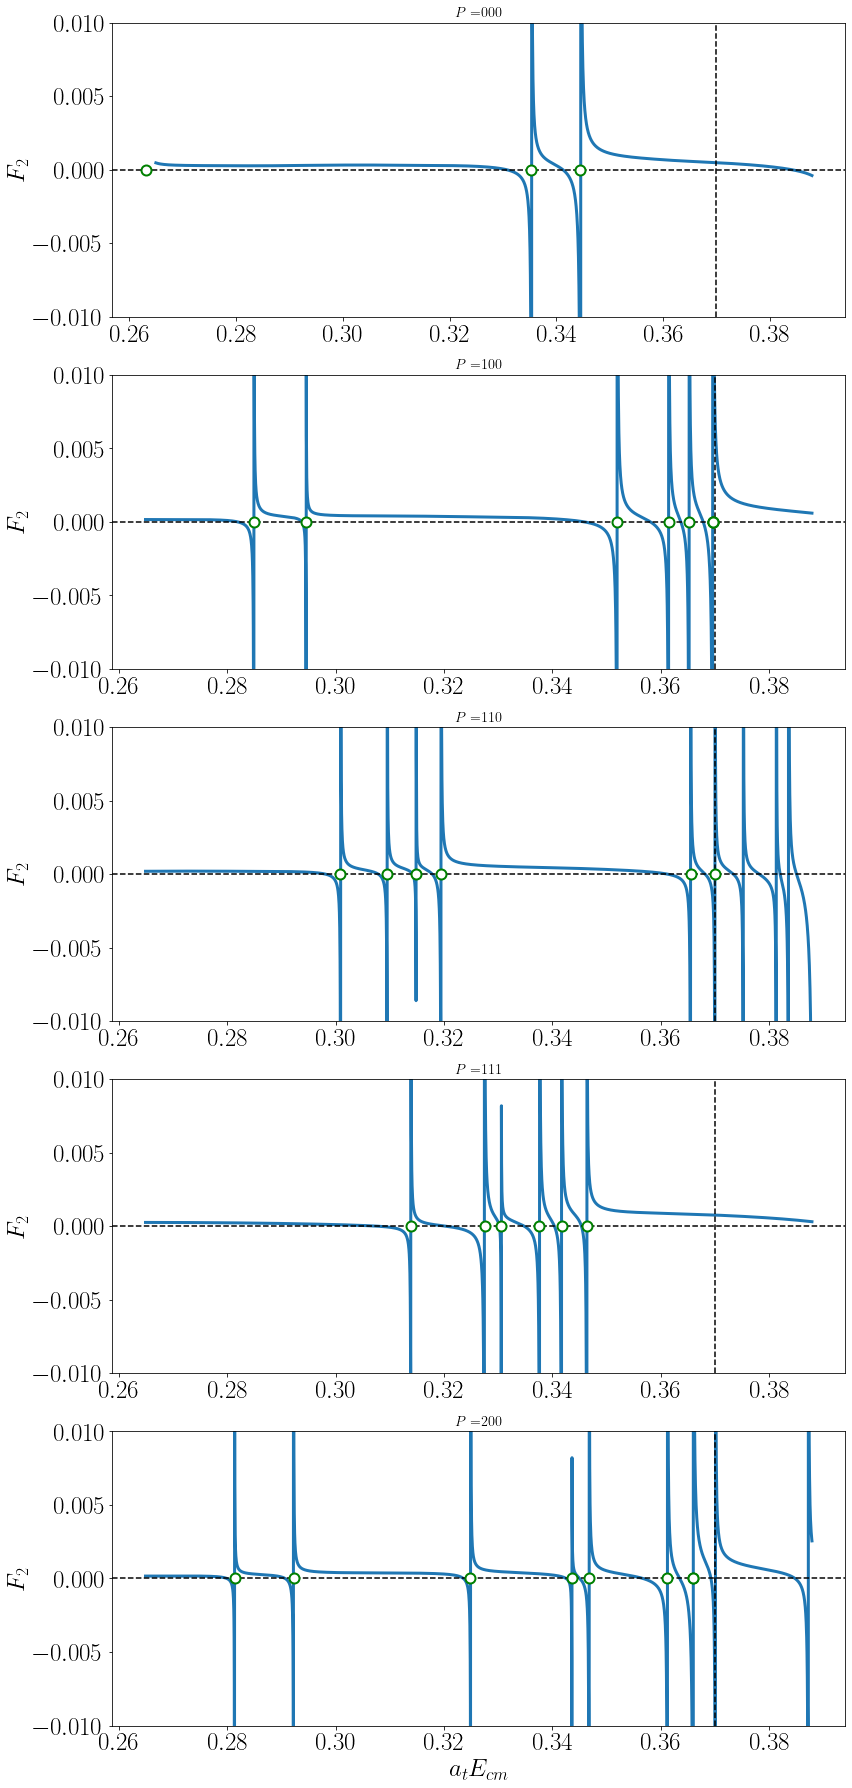

In [46]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from redstar (S2I2.energies)
# only A1m, A2 irrep is added for different boost P
# we also add the results of the denom 1 + (K2inv + G)F2inv to look for 
# the additional poles in F3

#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 12})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

additionalpolefile1 = "additional_poles2_F3_KKpi_L20_nP_000.dat"
additionalpolefile2 = "additional_poles2_F3_KKpi_L20_nP_100.dat"
additionalpolefile3 = "additional_poles2_F3_KKpi_L20_nP_110.dat"
additionalpolefile4 = "additional_poles2_F3_KKpi_L20_nP_111.dat"
additionalpolefile5 = "additional_poles2_F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [additionalpolefile1, additionalpolefile2, additionalpolefile3, additionalpolefile4, additionalpolefile5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]

for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)

    additionalpole_file = additionalpole_filelist[counter] 
    (En1, EcmR1, EcmI1, F21, F21sum, G1, G1sum, 
     K2i1, K2i1sum, F3det1, F3iso1) = np.genfromtxt(additionalpole_file, unpack=True)
    #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    non_int_energies_ecm, non_int_energies_elab = irrep_energy_list_maker(full_energy_list, selected_irrep_list[counter])
    #non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])
    print("E size = ",len(non_int_energies_ecm))
    
    zero_y_val = []
    for i in range(len(non_int_energies_ecm)):
        zero_y_val.append(0.0)
    
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    ax[counter].set_ylim(-1E-2,1E-2)
    #ax[counter].set_ylim(-1E-71,1E-71)
    #ax[counter].set_ylim(-500,500)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    #ax[counter].plot(EcmR,F3iso, linewidth=3, label=titlestring)
    ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1, linewidth=3, color='red', label=titlestring)
    ax[counter].scatter(non_int_energies_ecm,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black')
    ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    #ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$a_t E_{cm}$", fontsize=25)
    ax[counter].set_ylabel("$F_{2}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F2_KKpi_test_freespectrum_comparison.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])

file loaded =  F3_KKpi_L20_nP_000.dat
E size =  3
file loaded =  F3_KKpi_L20_nP_100.dat
E size =  9
file loaded =  F3_KKpi_L20_nP_110.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_111.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_200.dat
E size =  8
0


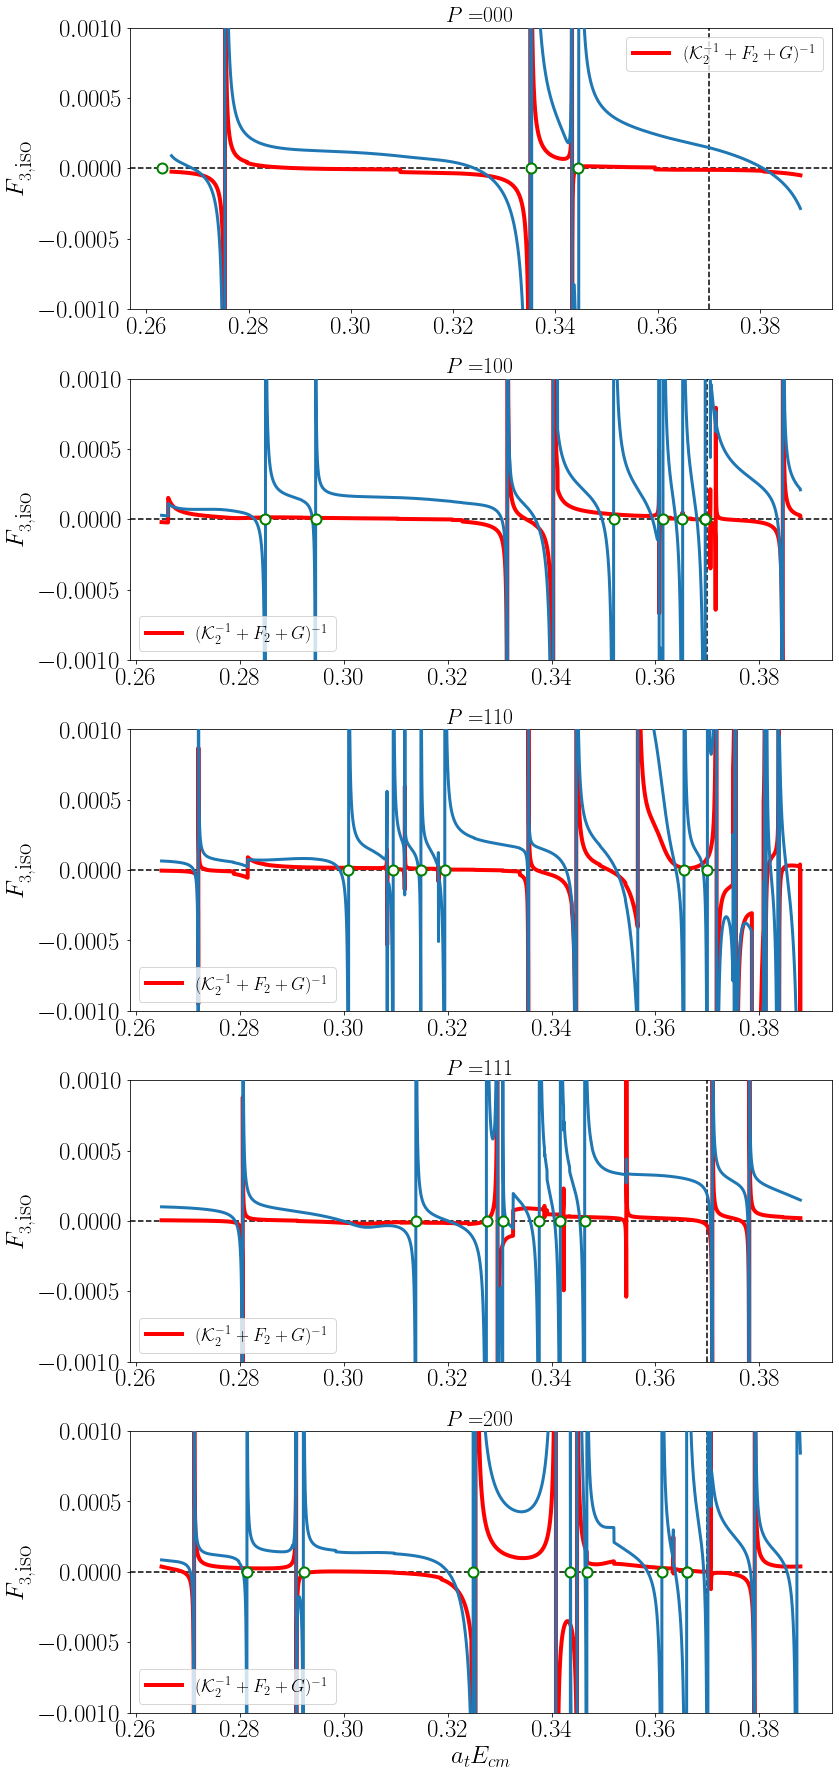

In [126]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from redstar (S2I2.energies)
# only A1m, A2 irrep is added for different boost P
# we also add the results of the denom 1 + (K2inv + G)F2inv to look for 
# the additional poles in F3

#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

additionalpolefile1 = "additional_poles3_F3_KKpi_L20_nP_000.dat"
additionalpolefile2 = "additional_poles3_F3_KKpi_L20_nP_100.dat"
additionalpolefile3 = "additional_poles3_F3_KKpi_L20_nP_110.dat"
additionalpolefile4 = "additional_poles3_F3_KKpi_L20_nP_111.dat"
additionalpolefile5 = "additional_poles3_F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [additionalpolefile1, additionalpolefile2, additionalpolefile3, additionalpolefile4, additionalpolefile5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]

drive = "/Users/digonto/GitHub/3body_quantization/lattice_data/KKpi_interacting_spectrum/Three_body/"
int_energy_filename1 = drive + "KKpi_spectrum.000_A1m"
int_energy_filename2 = drive + "KKpi_spectrum.100_A2"
int_energy_filename3 = drive + "KKpi_spectrum.110_A2"
int_energy_filename4 = drive + "KKpi_spectrum.111_A2"
int_energy_filename5 = drive + "KKpi_spectrum.200_A2"

int_energy_filelist = [int_energy_filename1, int_energy_filename2, int_energy_filename3, int_energy_filename4, int_energy_filename5]


for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)

    additionalpole_file = additionalpole_filelist[counter] 
    (En1, EcmR1, EcmI1, F21, F21sum, G1, G1sum, 
     K2i1, K2i1sum, F3det1, F3iso1) = np.genfromtxt(additionalpole_file, unpack=True)
    #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    non_int_energies_ecm, non_int_energies_elab = irrep_energy_list_maker(full_energy_list, selected_irrep_list[counter])
    #non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])
    print("E size = ",len(non_int_energies_ecm))

    np_non_int_energies_ecm = np.array(non_int_energies_ecm)

    (Lint, Ecm_int, err1_int, err2_int) = np.genfromtxt(int_energy_filelist[counter],unpack=True)
    
    zero_y_val = []
    for i in range(len(non_int_energies_ecm)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)

    zero_y_val2 = []
    for i in range(len(Ecm_int)):
        zero_y_val2.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)
    np_zero_y_val2 = np.array(zero_y_val2)
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    #ax[counter].set_ylim(-1E-2,1E-2)
    #ax[counter].set_ylim(-1E-71,1E-71)
    ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,F3iso, linewidth=3, zorder=4)
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(non_int_energies_ecm,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)

    ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$a_t E_{cm}$", fontsize=25)
    ax[counter].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F3iso_KKpi_test_freespectrum_comparison_2.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])

file found =  ./K3iso_from_mass_data/K3iso_P000_state0.dat
file found =  ./K3iso_from_mass_data/K3iso_P000_state1.dat
file found =  ./K3iso_from_mass_data/K3iso_P000_state2.dat
file found =  ./K3iso_from_mass_data/K3iso_P000_state3.dat
file found =  ./K3iso_from_mass_data/K3iso_P000_state4.dat
0


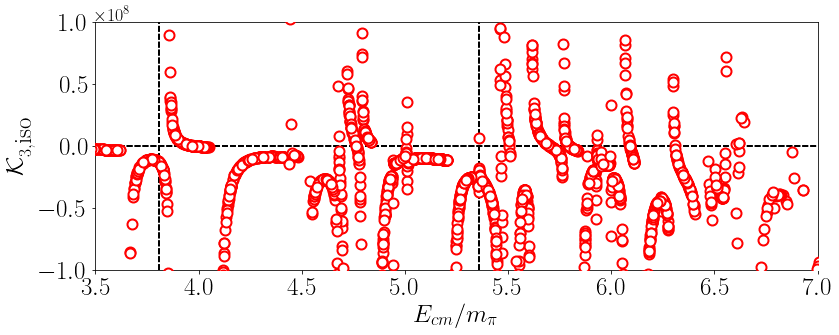

In [78]:
#Here we plot the K3iso from found from solving for -1/F3iso using the lattice data of L=20x128, 840


plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

additionalpolefile1 = "additional_poles3_F3_KKpi_L20_nP_000.dat"
additionalpolefile2 = "additional_poles3_F3_KKpi_L20_nP_100.dat"
additionalpolefile3 = "additional_poles3_F3_KKpi_L20_nP_110.dat"
additionalpolefile4 = "additional_poles3_F3_KKpi_L20_nP_111.dat"
additionalpolefile5 = "additional_poles3_F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906
atmK = 0.09698
KKpi_threshold = 2.0*atmK + atmpi 

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [additionalpolefile1, additionalpolefile2, additionalpolefile3, additionalpolefile4, additionalpolefile5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]


#P_list = ["000","001","011","111","002"]

P_list = ["000"]

markerlist = ['o', '*', 's','^','v']

fileheader = "./K3iso_from_mass_data/K3iso_P"#000_state0.dat"


for P in P_list:
    for state in range(8):
        filename = fileheader + P + "_state" + str(state) + ".dat"
        if(os.path.exists(filename)):
            print("file found = ", filename)
            (Elab, Ecm,K3iso) = np.genfromtxt(filename,unpack=True)
            label = P # "st $#$" + str(state) + "$, P=\[$" + P + "$\]$" 
            ax.set_xlim(3.5,7)
            ax.set_ylim(-1E8,1E8)
            ax.tick_params(axis='both', which='major', labelsize=25)
            ax.tick_params(axis='both', which='minor', labelsize=25)
            ax.scatter(Ecm/atmpi,K3iso, marker=markerlist[counter], s=100, linewidth=2, edgecolor='red',facecolor='white',zorder=5,label=label)
            ax.axhline(y=0,linestyle='--',color='black',zorder=2)
            ax.axvline(x=0.37/atmpi,linestyle='--',color='black',zorder=2)
            ax.axvline(x=KKpi_threshold/atmpi,linestyle='--',color='black',zorder=2)
            #ax.legend()
            #fig.tight_layout()
            ax.set_xlabel("$E_{cm}/m_\pi$", fontsize=25)
            ax.set_ylabel("$\mathcal{K}_{3,\\textrm{iso}}$",fontsize=25)
    counter=counter+1

fig.tight_layout()
plt.draw()


outputfile_str = "K3iso_KKpi_L20x128_840_lattice.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2]) 

file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P000_state_0.dat
gap found at =  0
0 1
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P000_state_1.dat
gap found at =  48
47 48
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P000_state_2.dat
gap found at =  48
47 48
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P000_state_3.dat
gap found at =  0
0 1
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P000_state_4.dat
gap found at =  27
27 28
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P001_state_0.dat
gap found at =  48
47 48
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P001_state_1.dat
gap found at =  0
0 1
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P001_state_2.dat
gap found at =  33
33 34
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P001_state_3.dat
gap found at =  2
2 3
file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P001_state_4.dat
gap found at =  48
47 48
file found =  ./K3iso_

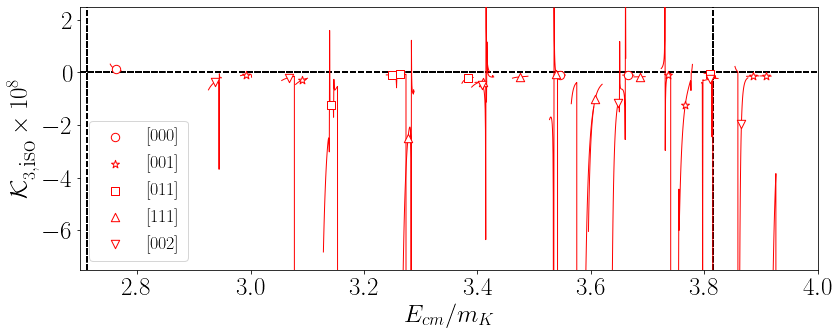

In [134]:
#Here we plot the K3iso from found from solving for -1/F3iso using the lattice data of L=20x128, 840

def gap_splitter(data1,data2):
    array11 = []
    array12 = []
    array21 = []
    array22 = []

    gap = 0
    
    gap_index = 0
    temp_gap = 0 
    for i in range(len(data2)-1):
        gap = abs(data2[i] - data2[i+1])
        #print("gap = ", gap,"id=",i,"tempgap=",temp_gap,"data1 = ",data2[i],"data2 = ",data2[i+1])
        if(gap>temp_gap): 
            gap_index = i
            temp_gap = gap 
            #print("gap found id = ",gap_index)
            
    
    print(gap, gap_index)
    for i in range(0,gap_index-1,1):
        array11.append(data1[i])
        array12.append(data2[i])
    
    for i in range(gap_index+1,len(data2),1):
        array21.append(data1[i])
        array22.append(data2[i])

    np_array_11 = np.array(array11)
    np_array_12 = np.array(array12)
    np_array_21 = np.array(array21)
    np_array_22 = np.array(array22)

    return np_array_11, np_array_12, np_array_21, np_array_22 

def three_gap_splitter(data1,data2):
    array11 = []
    array12 = []
    array21 = []
    array22 = []
    array31 = []
    array32 = []

    gap_vec = []
    gap_ind = []

    gap = 0
    gap_index = 0
    temp_gap = 0 
    first_gap = 0
    first_gap_ind = 0
    second_gap = 0
    second_gap_ind = 0 

    for i in range(len(data2)-1):
        gap = abs(data2[i] - data2[i+1])
        gap_vec.append(gap)
        gap_ind.append(i)

    for i in range(len(gap_vec)):
        if(gap_vec[i]>temp_gap):
            temp_gap = gap_vec[i]
            first_gap_ind = i
    
    print("gap found at = ",first_gap_ind)
    temp_gap = 0

    for i in range(0,len(gap_vec),1):
        if(gap_vec[i]>temp_gap and i!=first_gap_ind):
            temp_gap = gap_vec[i]
            second_gap_ind = i

    if(second_gap_ind<first_gap_ind):
        temp_ind = first_gap_ind 
        first_gap_ind = second_gap_ind 
        second_gap_ind = temp_ind 

    for i in range(0,first_gap_ind,1):
        array11.append(data1[i])
        array12.append(data2[i])
    
    for i in range(first_gap_ind+1,second_gap_ind,1):
        array21.append(data1[i])
        array22.append(data2[i])

    for i in range(second_gap_ind+1,len(data2),1):
        array31.append(data1[i])
        array32.append(data2[i])

    np_array_11 = np.array(array11)
    np_array_12 = np.array(array12)
    np_array_21 = np.array(array21)
    np_array_22 = np.array(array22)
    np_array_31 = np.array(array31)
    np_array_32 = np.array(array32)

    print(first_gap_ind, second_gap_ind)

    return np_array_11, np_array_12, np_array_21, np_array_22, np_array_31, np_array_32 


plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

additionalpolefile1 = "additional_poles3_F3_KKpi_L20_nP_000.dat"
additionalpolefile2 = "additional_poles3_F3_KKpi_L20_nP_100.dat"
additionalpolefile3 = "additional_poles3_F3_KKpi_L20_nP_110.dat"
additionalpolefile4 = "additional_poles3_F3_KKpi_L20_nP_111.dat"
additionalpolefile5 = "additional_poles3_F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906
atmK = 0.09698
KKpi_threshold = 2.0*atmK + atmpi 

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [additionalpolefile1, additionalpolefile2, additionalpolefile3, additionalpolefile4, additionalpolefile5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]


P_list = ["000","001","011","111","002"]

#P_list = ["111"]

markerlist = ['o', '*', 's','^','v']

fileheader = "./K3iso_jackavg_lattice_data/K3iso_jackavg_P"#000_state_0.dat"
centerfileheader = "./K3iso_jackavg_lattice_data/K3iso_jackavg_centralval_P"

for P in P_list:
    #central values 
    central_file = centerfileheader + P + ".dat"
    if(os.path.exists(central_file)):
        (Elabc, Ecmc, K3isoc) = np.genfromtxt(central_file, unpack=True)
        
    for state in range(8):
        filename = fileheader + P + "_state_" + str(state) + ".dat"
        if(os.path.exists(filename)):
            print("file found = ", filename)
            (Elab, Ecm, K3iso) = np.genfromtxt(filename,unpack=True)
            label = "[" + P + "]" # "st $#$" + str(state) + "$, P=\[$" + P + "$\]$" 
            ax.set_xlim(2.7,4)
            ax.set_ylim(-7.5,2.5)
            ax.tick_params(axis='both', which='major', labelsize=25)
            ax.tick_params(axis='both', which='minor', labelsize=25)
            ax.plot(Ecm/atmK,K3iso/1E8, linewidth=1, color='red',zorder=5)
            Ecm1, K3iso1, Ecm2, K3iso2, Ecm3, K3iso3 = three_gap_splitter(Ecm, K3iso)

            #if(len(Ecm1)!=0):
            #    ax.plot(Ecm1/atmK,K3iso1/1E8, linewidth=1, color='red',zorder=5)
            
            #if(len(Ecm2)!=0):
            #    ax.plot(Ecm2/atmK,K3iso2/1E8, linewidth=1, color='red',zorder=5)
            
            #if(len(Ecm3)!=0):
            #    ax.plot(Ecm3/atmK,K3iso3/1E8, linewidth=1, color='red',zorder=5)
            
            #ax.scatter(Ecm/atmK,K3iso/1E8, marker='.', s=10, linewidth=1, edgecolor='red',facecolor='white',zorder=5, clip_on=True)
            ax.scatter(Ecmc[state]/atmK,K3isoc[state]/1E8, marker=markerlist[counter], s=70, linewidth=1, edgecolor='red',facecolor='white',zorder=6,label=label if state==0 else "", clip_on=True)
            
            ax.axhline(y=0,linestyle='--',color='black',zorder=2)
            ax.axvline(x=0.37/atmK,linestyle='--',color='black',zorder=2)
            ax.axvline(x=KKpi_threshold/atmK,linestyle='--',color='black',zorder=2)
            ax.legend()
            #fig.tight_layout()
            ax.set_xlabel("$E_{cm}/m_K$", fontsize=25)
            ax.set_ylabel("$\mathcal{K}_{3,\\textrm{iso}} \\times 10^8$",fontsize=25)
    
        
    
    counter=counter+1

fig.tight_layout()
plt.draw()


outputfile_str = "K3iso_KKpi_L20x128_840_lattice_jackavgdata.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2]) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file found =  ./K3iso_jackavg_lattice_data/K3iso_jackavg_P111_state_3.dat
gap found at =  30
30 31
0


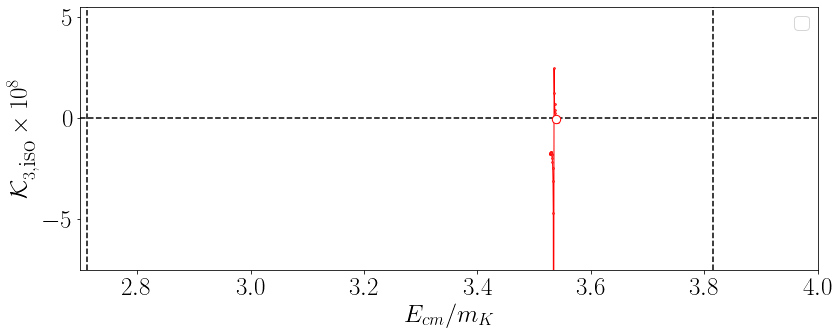

In [128]:
#Here we plot the K3iso from found from solving for -1/F3iso using the lattice data of L=20x128, 840

def gap_splitter(data1,data2):
    array11 = []
    array12 = []
    array21 = []
    array22 = []

    gap = 0
    
    gap_index = 0
    temp_gap = 0 
    for i in range(len(data2)-1):
        gap = abs(data2[i] - data2[i+1])
        #print("gap = ", gap,"id=",i,"tempgap=",temp_gap,"data1 = ",data2[i],"data2 = ",data2[i+1])
        if(gap>temp_gap): 
            gap_index = i
            temp_gap = gap 
            #print("gap found id = ",gap_index)
            
    
    print(gap, gap_index)
    for i in range(0,gap_index-1,1):
        array11.append(data1[i])
        array12.append(data2[i])
    
    for i in range(gap_index+1,len(data2),1):
        array21.append(data1[i])
        array22.append(data2[i])

    np_array_11 = np.array(array11)
    np_array_12 = np.array(array12)
    np_array_21 = np.array(array21)
    np_array_22 = np.array(array22)

    return np_array_11, np_array_12, np_array_21, np_array_22 

def three_gap_splitter(data1,data2):
    array11 = []
    array12 = []
    array21 = []
    array22 = []
    array31 = []
    array32 = []

    gap_vec = []
    gap_ind = []

    gap = 0
    gap_index = 0
    temp_gap = 0 
    first_gap = 0
    first_gap_ind = 0
    second_gap = 0
    second_gap_ind = 0 

    f = open("tempgap.dat",'w')

    for i in range(len(data2)-1):
        gap = abs(data2[i] - data2[i+1])
        gap_vec.append(gap)
        gap_ind.append(i)
        f.write(str(i) + '\t' + str(gap) + '\n')
    f.close()

    for i in range(len(gap_vec)):
        if(gap_vec[i]>temp_gap):
            temp_gap = gap_vec[i]
            first_gap_ind = i
    
    print("gap found at = ",first_gap_ind)
    temp_gap = 0

    for i in range(0,len(gap_vec),1):
        if(gap_vec[i]>temp_gap and i!=first_gap_ind):
            temp_gap = gap_vec[i]
            second_gap_ind = i

    if(second_gap_ind<first_gap_ind):
        temp_ind = first_gap_ind 
        first_gap_ind = second_gap_ind 
        second_gap_ind = temp_ind 

    for i in range(0,first_gap_ind,1):
        array11.append(data1[i])
        array12.append(data2[i])
    
    for i in range(first_gap_ind+1,second_gap_ind,1):
        array21.append(data1[i])
        array22.append(data2[i])

    for i in range(second_gap_ind+1,len(data2),1):
        array31.append(data1[i])
        array32.append(data2[i])

    np_array_11 = np.array(array11)
    np_array_12 = np.array(array12)
    np_array_21 = np.array(array21)
    np_array_22 = np.array(array22)
    np_array_31 = np.array(array31)
    np_array_32 = np.array(array32)

    print(first_gap_ind, second_gap_ind)

    return np_array_11, np_array_12, np_array_21, np_array_22, np_array_31, np_array_32 


plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000.dat"
filename2 = "F3_KKpi_L20_nP_100.dat"
filename3 = "F3_KKpi_L20_nP_110.dat"
filename4 = "F3_KKpi_L20_nP_111.dat"
filename5 = "F3_KKpi_L20_nP_200.dat"

additionalpolefile1 = "additional_poles3_F3_KKpi_L20_nP_000.dat"
additionalpolefile2 = "additional_poles3_F3_KKpi_L20_nP_100.dat"
additionalpolefile3 = "additional_poles3_F3_KKpi_L20_nP_110.dat"
additionalpolefile4 = "additional_poles3_F3_KKpi_L20_nP_111.dat"
additionalpolefile5 = "additional_poles3_F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906
atmK = 0.09698
KKpi_threshold = 2.0*atmK + atmpi 

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [additionalpolefile1, additionalpolefile2, additionalpolefile3, additionalpolefile4, additionalpolefile5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(figsize=(12,5))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]


P_list = ["000","001","011","111","002"]

P_list = ["111"]

markerlist = ['o', '*', 's','^','v']

fileheader = "./K3iso_jackavg_lattice_data/K3iso_jackavg_P"#000_state_0.dat"
centerfileheader = "./K3iso_jackavg_lattice_data/K3iso_jackavg_centralval_P"

for P in P_list:
    #central values 
    central_file = centerfileheader + P + ".dat"
    if(os.path.exists(central_file)):
        (Elabc, Ecmc, K3isoc) = np.genfromtxt(central_file, unpack=True)
        
    for state in range(3,4):
        filename = fileheader + P + "_state_" + str(state) + ".dat"
        if(os.path.exists(filename)):
            print("file found = ", filename)
            (Elab, Ecm, K3iso) = np.genfromtxt(filename,unpack=True)
            label = "[" + P + "]" # "st $#$" + str(state) + "$, P=\[$" + P + "$\]$" 
            ax.set_xlim(2.7,4)
            ax.set_ylim(-7.5,5.5)
            ax.tick_params(axis='both', which='major', labelsize=25)
            ax.tick_params(axis='both', which='minor', labelsize=25)
            #ax.plot(Ecm/atmpi,K3iso, linewidth=2, color='red',zorder=5,label=label)
            Ecm1, K3iso1, Ecm2, K3iso2, Ecm3, K3iso3 = three_gap_splitter(Ecm, K3iso)

            if(len(Ecm1)!=0):
                ax.plot(Ecm1/atmK,K3iso1/1E8, linewidth=1, color='red',zorder=5)
            
            if(len(Ecm2)!=0):
                ax.plot(Ecm2/atmK,K3iso2/1E8, linewidth=1, color='red',zorder=5)
            
            if(len(Ecm3)!=0):
                ax.plot(Ecm3/atmK,K3iso3/1E8, linewidth=1, color='red',zorder=5)
            
            ax.scatter(Ecm/atmK,K3iso/1E8, marker='.', s=10, linewidth=1, edgecolor='red',facecolor='white',zorder=5, clip_on=True)
            ax.scatter(Ecmc[state]/atmK,K3isoc[state]/1E8, marker=markerlist[counter], s=70, linewidth=1, edgecolor='red',facecolor='white',zorder=6,label=label if state==0 else "", clip_on=True)
            
            ax.axhline(y=0,linestyle='--',color='black',zorder=2)
            ax.axvline(x=0.37/atmK,linestyle='--',color='black',zorder=2)
            ax.axvline(x=KKpi_threshold/atmK,linestyle='--',color='black',zorder=2)
            ax.legend()
            #fig.tight_layout()
            ax.set_xlabel("$E_{cm}/m_K$", fontsize=25)
            ax.set_ylabel("$\mathcal{K}_{3,\\textrm{iso}} \\times 10^8$",fontsize=25)
    
        
    
    counter=counter+1

fig.tight_layout()
plt.draw()


outputfile_str = "temp.pdf"#"K3iso_KKpi_L20x128_840_lattice_jackavgdata.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2]) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file loaded =  F3_KKpi_L20_nP_000_1.dat
E size =  3
file loaded =  F3_KKpi_L20_nP_100_1.dat
E size =  9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file loaded =  F3_KKpi_L20_nP_110_1.dat
E size =  6
file loaded =  F3_KKpi_L20_nP_111_1.dat
E size =  6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file loaded =  F3_KKpi_L20_nP_200_1.dat
E size =  8
0


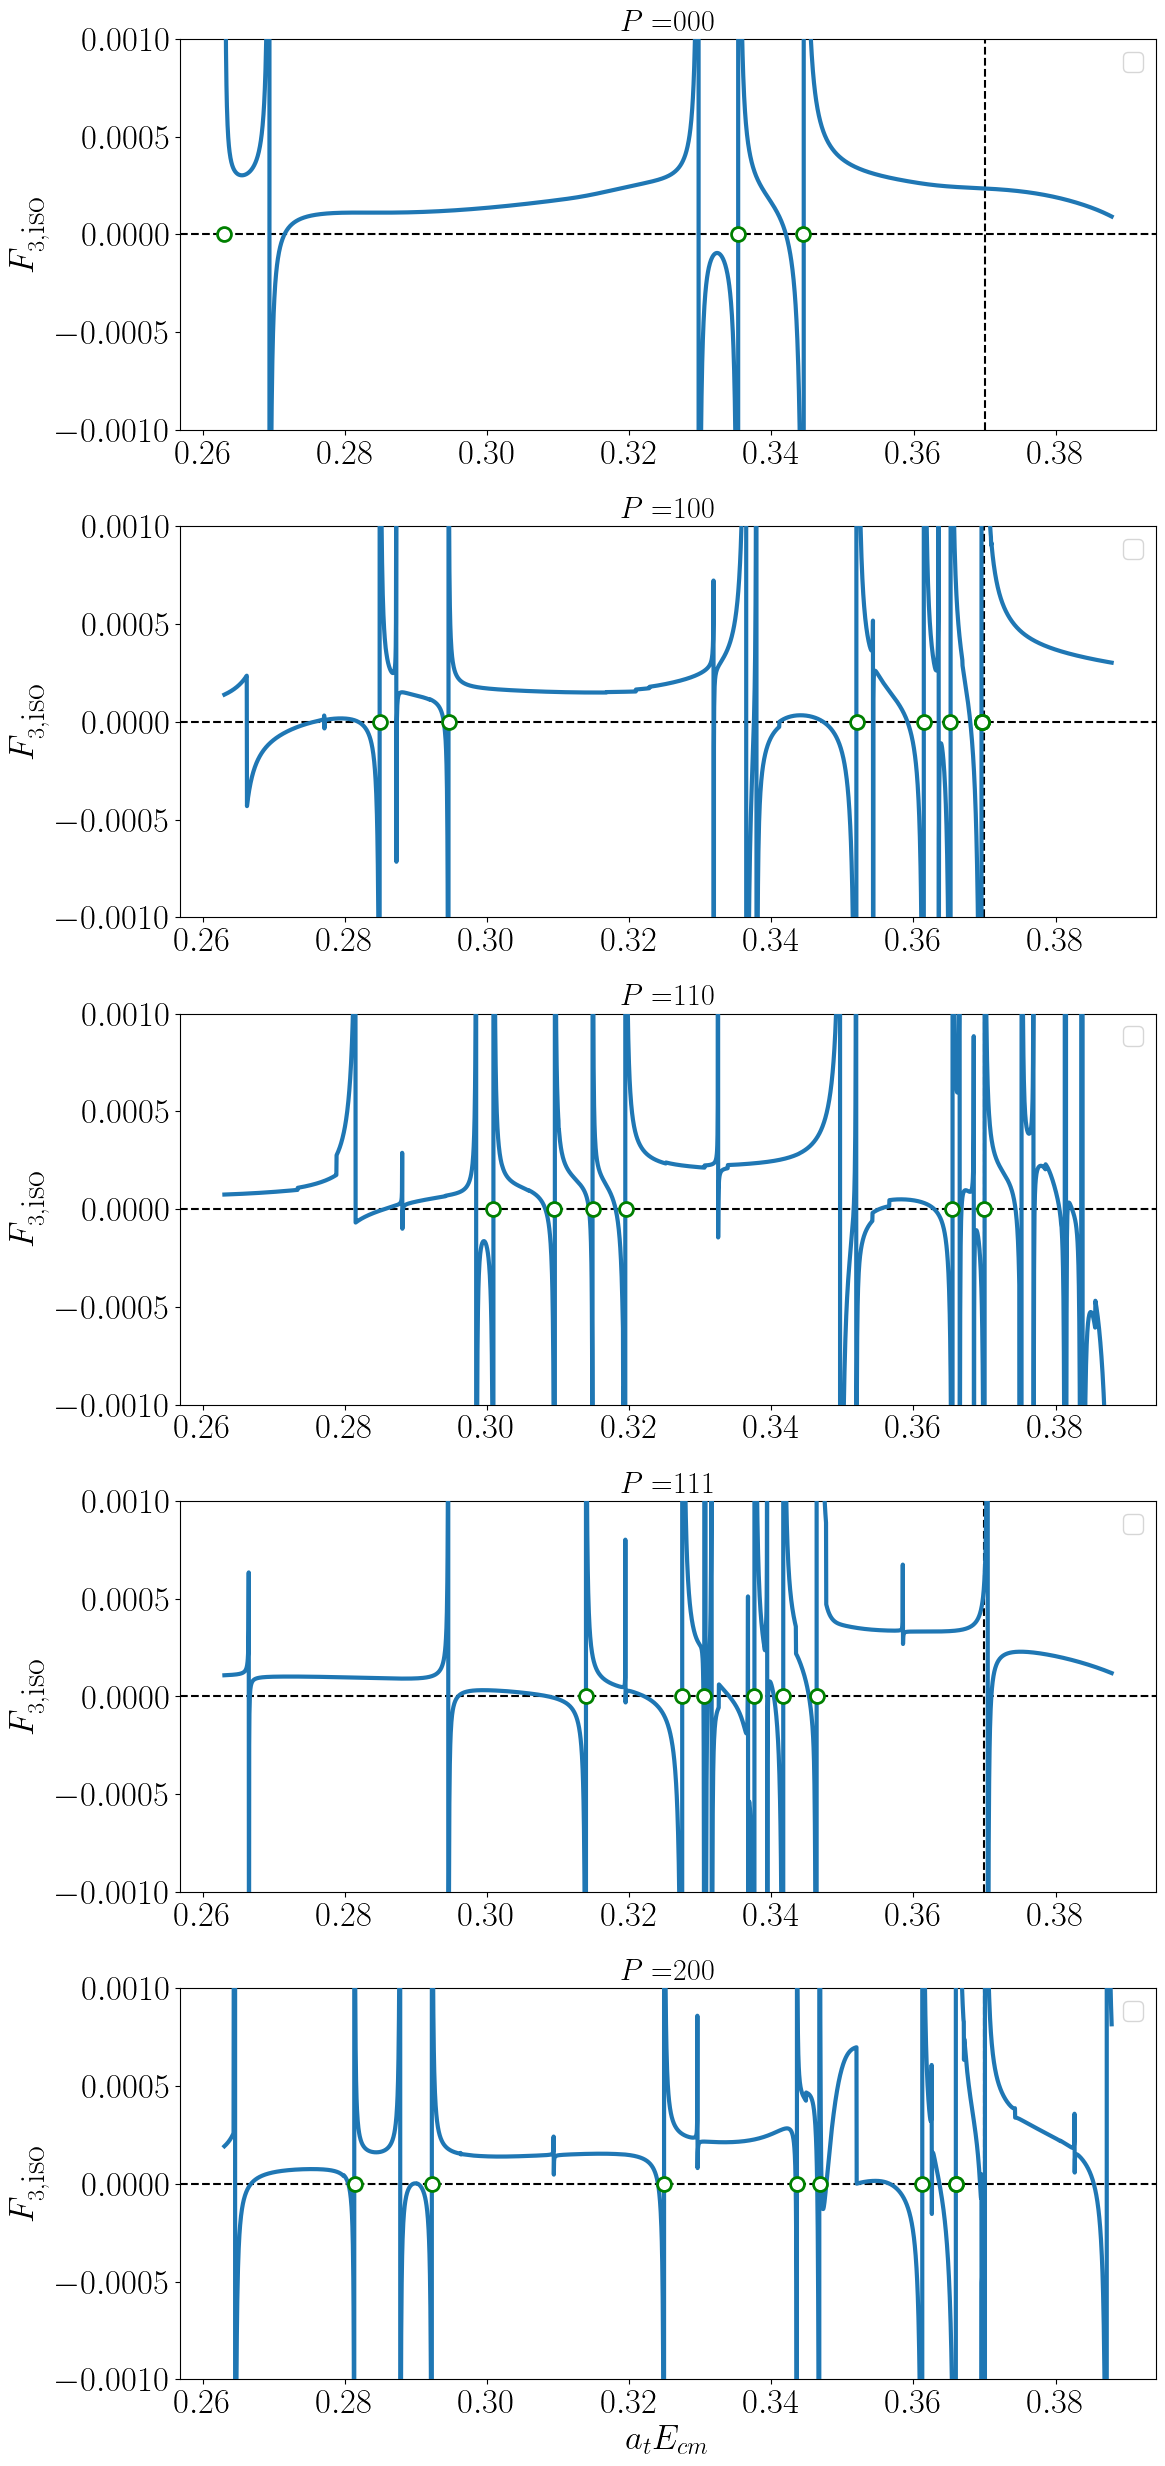

In [4]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from redstar (S2I2.energies)
# only A1m, A2 irrep is added for different boost P
# we also add the results of the denom 1 + (K2inv + G)F2inv to look for 
# the additional poles in F3

#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_KKpi_L20_nP_000_1.dat"
filename2 = "F3_KKpi_L20_nP_100_1.dat"
filename3 = "F3_KKpi_L20_nP_110_1.dat"
filename4 = "F3_KKpi_L20_nP_111_1.dat"
filename5 = "F3_KKpi_L20_nP_200_1.dat"

additionalpolefile1 = "additional_poles3_F3_KKpi_L20_nP_000.dat"
additionalpolefile2 = "additional_poles3_F3_KKpi_L20_nP_100.dat"
additionalpolefile3 = "additional_poles3_F3_KKpi_L20_nP_110.dat"
additionalpolefile4 = "additional_poles3_F3_KKpi_L20_nP_111.dat"
additionalpolefile5 = "additional_poles3_F3_KKpi_L20_nP_200.dat"

atmpi = 0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [additionalpolefile1, additionalpolefile2, additionalpolefile3, additionalpolefile4, additionalpolefile5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
energy_file = "S2I2.energies"
full_energy_list, irrep_list = irrep_list_maker(energy_file)
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]

drive = "/home/digonto/Codes/Practical_Lattice_v2/3body_quantization/lattice_data/KKpi_interacting_spectrum/Three_body/"
int_energy_filename1 = drive + "KKpi_spectrum.000_A1m"
int_energy_filename2 = drive + "KKpi_spectrum.100_A2"
int_energy_filename3 = drive + "KKpi_spectrum.110_A2"
int_energy_filename4 = drive + "KKpi_spectrum.111_A2"
int_energy_filename5 = drive + "KKpi_spectrum.200_A2"

int_energy_filelist = [int_energy_filename1, int_energy_filename2, int_energy_filename3, int_energy_filename4, int_energy_filename5]


for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)

    additionalpole_file = additionalpole_filelist[counter] 
    (En1, EcmR1, EcmI1, F21, F21sum, G1, G1sum, 
     K2i1, K2i1sum, F3det1, F3iso1) = np.genfromtxt(additionalpole_file, unpack=True)
    #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    non_int_energies_ecm, non_int_energies_elab = irrep_energy_list_maker(full_energy_list, selected_irrep_list[counter])
    #non_int_energies_ecm, non_int_energies_elab = energy_list_maker_fixedmom(full_energy_list, titlelist[counter])
    print("E size = ",len(non_int_energies_ecm))

    np_non_int_energies_ecm = np.array(non_int_energies_ecm)

    (Lint, Ecm_int, err1_int, err2_int) = np.genfromtxt(int_energy_filelist[counter],unpack=True)
    
    zero_y_val = []
    for i in range(len(non_int_energies_ecm)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)

    zero_y_val2 = []
    for i in range(len(Ecm_int)):
        zero_y_val2.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)
    np_zero_y_val2 = np.array(zero_y_val2)
    #ax[counter].set_ylabel("det $F_{3}$",fontsize=25)
    #ax[counter].set_xlim(0.2,0.34)
    #ax[counter].set_ylim(-1E-2,1E-2)
    #ax[counter].set_ylim(-1E-71,1E-71)
    ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,F3iso, linewidth=3, zorder=4)
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(non_int_energies_ecm,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)

    ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$a_t E_{cm}$", fontsize=25)
    ax[counter].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F3iso_KKpi_test_freespectrum_comparison_3.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])

file loaded =  F3_ma=inf_KKpi_L20_nP_000.dat
file loaded =  F3_ma=inf_KKpi_L20_nP_100.dat
file loaded =  F3_ma=inf_KKpi_L20_nP_110.dat
file loaded =  F3_ma=inf_KKpi_L20_nP_111.dat
file loaded =  F3_ma=inf_KKpi_L20_nP_200.dat
0


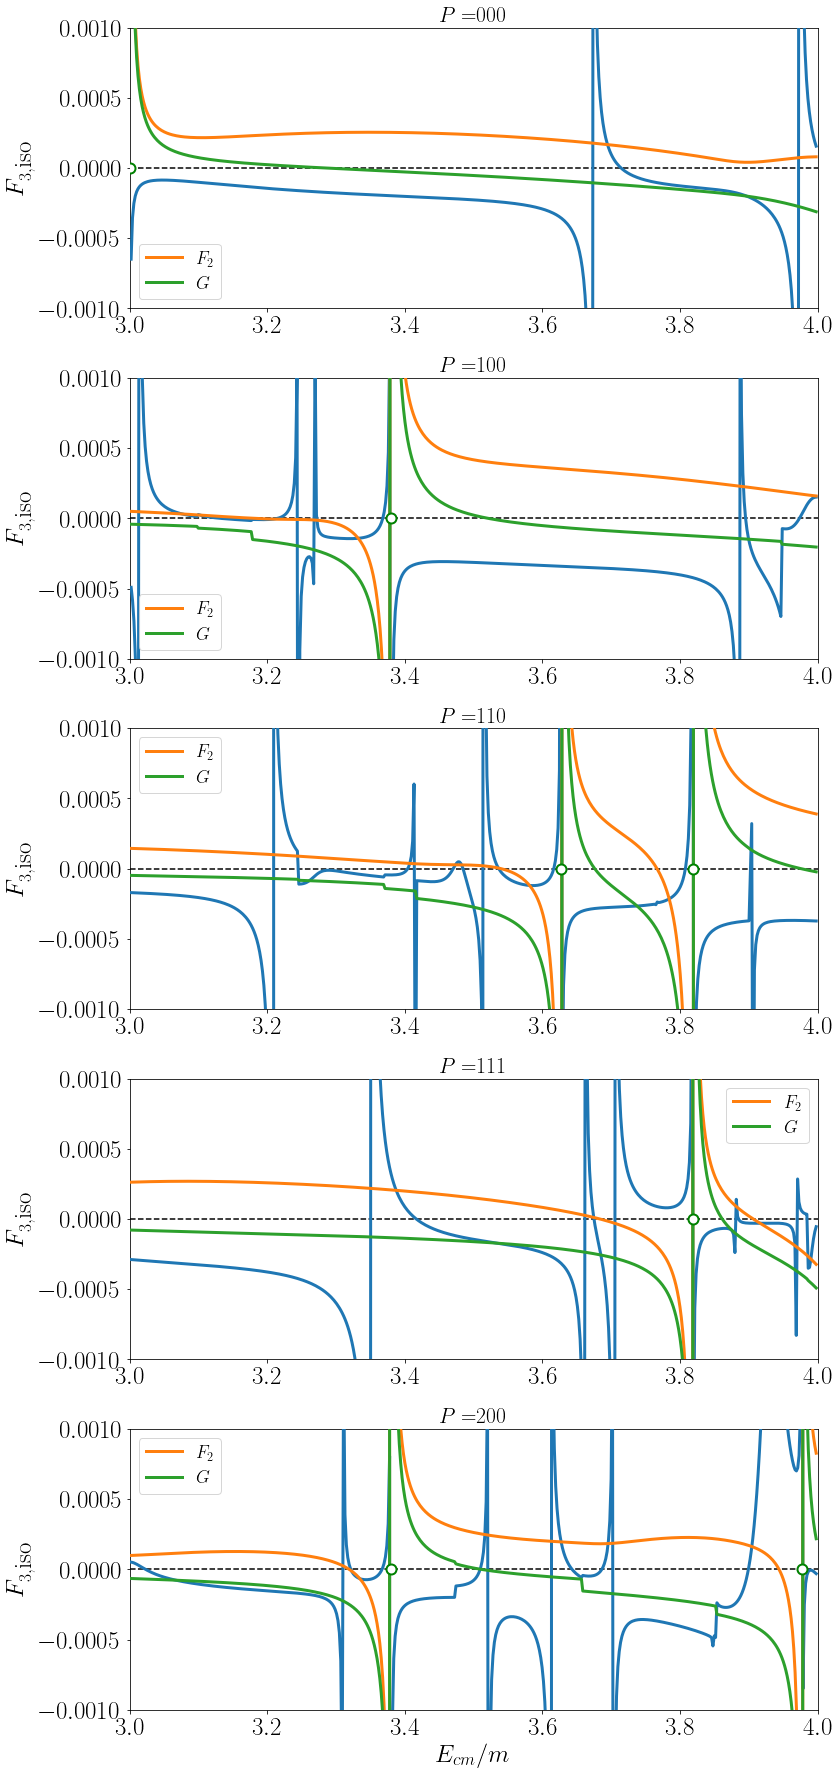

In [167]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from threebody_non_int_spectrum() code 


#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_ma=inf_KKpi_L20_nP_000.dat"
filename2 = "F3_ma=inf_KKpi_L20_nP_100.dat"
filename3 = "F3_ma=inf_KKpi_L20_nP_110.dat"
filename4 = "F3_ma=inf_KKpi_L20_nP_111.dat"
filename5 = "F3_ma=inf_KKpi_L20_nP_200.dat"

spectrum1 = "non_int_3body_nP000.dat"
spectrum2 = "non_int_3body_nP100.dat"
spectrum3 = "non_int_3body_nP110.dat"
spectrum4 = "non_int_3body_nP111.dat"
spectrum5 = "non_int_3body_nP200.dat"

Gpole1 = "Gpole_3body_nP000.dat"
Gpole2 = "Gpole_3body_nP100.dat"
Gpole3 = "Gpole_3body_nP110.dat"
Gpole4 = "Gpole_3body_nP111.dat"
Gpole5 = "Gpole_3body_nP200.dat"

atmpi = 1#0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [spectrum1, spectrum2, spectrum3, spectrum4, spectrum5]
additionalpole_filelist1 = [Gpole1, Gpole2, Gpole3, Gpole4, Gpole5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]


for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, F2sum, G, Gsum, 
     K2i, K2isum, F3det, F3iso) = np.genfromtxt(filename, unpack=True)

    additionalpole_file = additionalpole_filelist[counter] 
    additionalpole_file1 = additionalpole_filelist1[counter] 

    (EcmR1) = np.genfromtxt(additionalpole_file, unpack=True)
    (gpole1) = np.genfromtxt(additionalpole_file1, unpack=True)
    #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    
    zero_y_val = []
    for i in range(len(EcmR1)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)

    zero_y_val1 = []
    for i in range(len(gpole1)):
        zero_y_val1.append(0.0)
    
    np_zero_y_val1 = np.array(zero_y_val1)

    ax[counter].set_xlim(3,4)
    #ax[counter].set_ylim(-1E-17,1E-17)
    ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,F3iso, linewidth=3, zorder=4)
    ax[counter].plot(EcmR,F2sum, linewidth=3, zorder=4,label="$F_2$")
    ax[counter].plot(EcmR,Gsum, linewidth=3, zorder=4,label="$G$")
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(EcmR1,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].scatter(gpole1,zero_y_val1, marker='o', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)

    #ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$E_{cm}/m$", fontsize=25)
    ax[counter].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F3iso_ID_test_ma=inf.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file loaded =  F3_ma=inf_KKpi_L20_nP_000.dat


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file loaded =  F3_ma=inf_KKpi_L20_nP_100.dat


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file loaded =  F3_ma=inf_KKpi_L20_nP_110.dat


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file loaded =  F3_ma=inf_KKpi_L20_nP_111.dat


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


file loaded =  F3_ma=inf_KKpi_L20_nP_200.dat
0


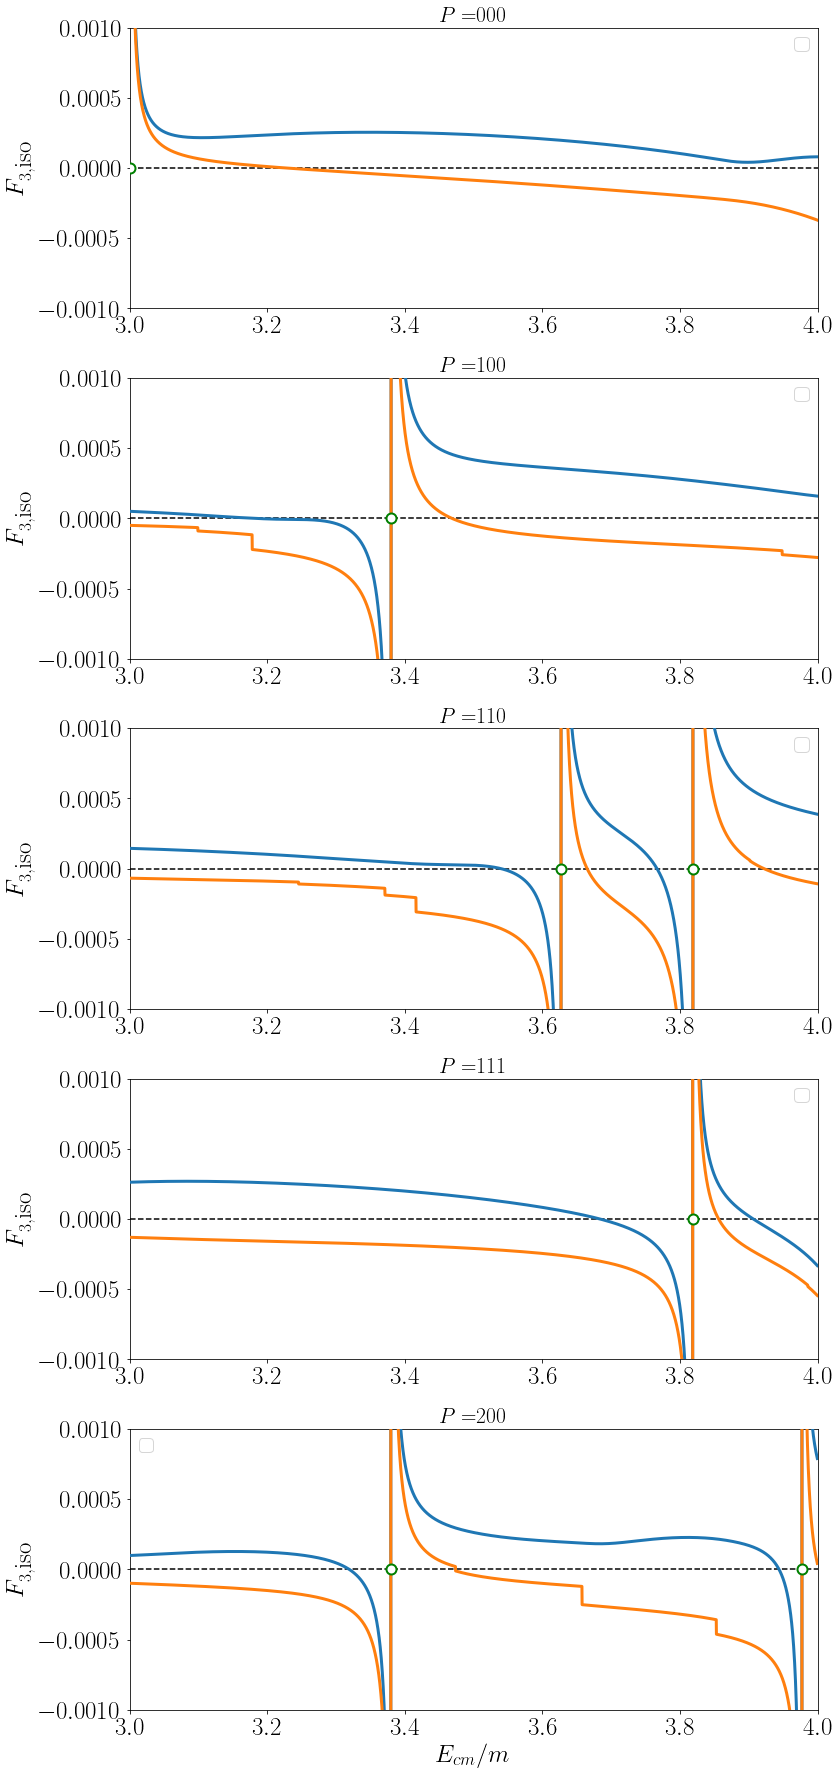

In [138]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from threebody_non_int_spectrum() code 


#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_ma=inf_KKpi_L20_nP_000.dat"
filename2 = "F3_ma=inf_KKpi_L20_nP_100.dat"
filename3 = "F3_ma=inf_KKpi_L20_nP_110.dat"
filename4 = "F3_ma=inf_KKpi_L20_nP_111.dat"
filename5 = "F3_ma=inf_KKpi_L20_nP_200.dat"

spectrum1 = "non_int_3body_nP000.dat"
spectrum2 = "non_int_3body_nP100.dat"
spectrum3 = "non_int_3body_nP110.dat"
spectrum4 = "non_int_3body_nP111.dat"
spectrum5 = "non_int_3body_nP200.dat"

atmpi = 1#0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [spectrum1, spectrum2, spectrum3, spectrum4, spectrum5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]


for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, F2sum, G, Gsum, 
     K2i, K2isum, F3det, F3iso) = np.genfromtxt(filename, unpack=True)

    additionalpole_file = additionalpole_filelist[counter] 
    (EcmR1) = np.genfromtxt(additionalpole_file, unpack=True)
    #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    
    zero_y_val = []
    for i in range(len(EcmR1)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)

    ax[counter].set_xlim(3,4)
    #ax[counter].set_ylim(-1E-71,1E-71)
    ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,F2sum, linewidth=3, zorder=4)
    ax[counter].plot(EcmR,Gsum, linewidth=3, zorder=4)
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(EcmR1,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)

    #ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$E_{cm}/m$", fontsize=25)
    ax[counter].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F3iso_ID_test_ma=inf.pdf"
plt.savefig(outputfile_str)
#plt.close()

print(full_energy_list[0][1][2])

file loaded =  Gmat_vs_sigk_En_3.050000_nP_100_np_000.dat
file loaded =  Gmat_vs_sigk_En_3.080000_nP_100_np_000.dat
file loaded =  Gmat_vs_sigk_En_3.110000_nP_100_np_000.dat
file loaded =  Gmat_vs_sigk_En_3.140000_nP_100_np_000.dat
file loaded =  Gmat_vs_sigk_En_3.170000_nP_100_np_000.dat
file loaded =  Gmat_vs_sigk_En_3.200000_nP_100_np_000.dat


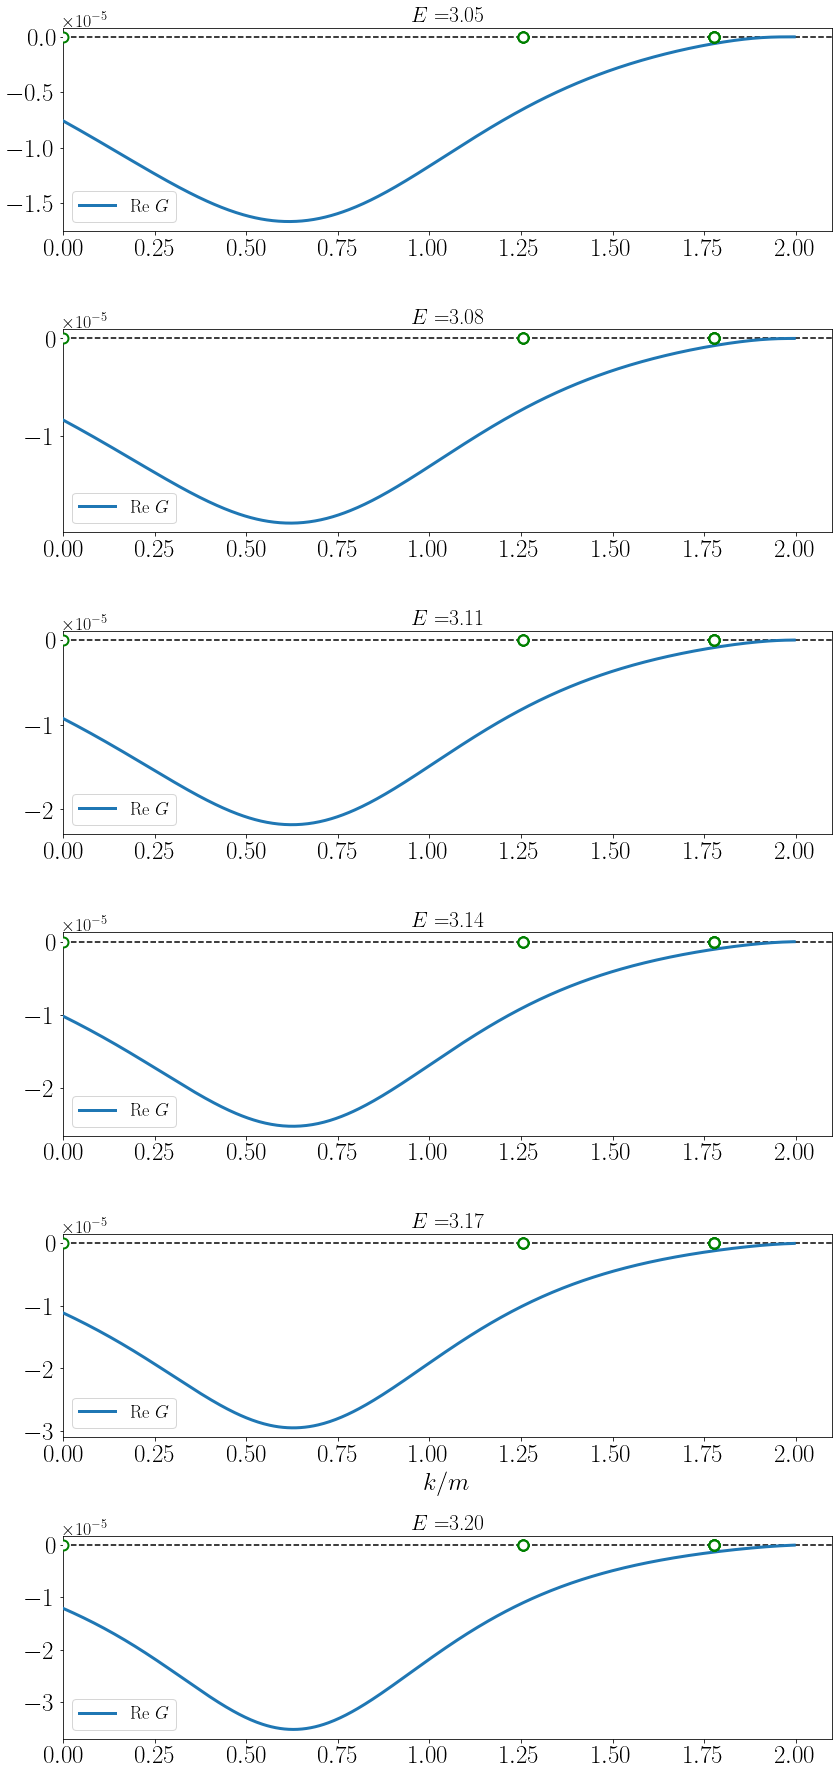

In [6]:
#Here we plot the Gij function for different spectator
#momenta k, we also plot the cutoff function to see upto 
#which momenta it provides support, along with the momenta 
#in lattice units 

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "Gmat_vs_sigk_En_3.050000_nP_100_np_000.dat"
filename2 = "Gmat_vs_sigk_En_3.080000_nP_100_np_000.dat"
filename3 = "Gmat_vs_sigk_En_3.110000_nP_100_np_000.dat"
filename4 = "Gmat_vs_sigk_En_3.140000_nP_100_np_000.dat"
filename5 = "Gmat_vs_sigk_En_3.170000_nP_100_np_000.dat"
filename6 = "Gmat_vs_sigk_En_3.200000_nP_100_np_000.dat"

p_in_lat_file = "p_in_lattice_unit.dat"

atmpi = 1#0.06906

titlelist = ["3.05","3.08","3.11","3.14","3.17","3.20"]
#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5, filename6]
fig,ax = plt.subplots(len(filelist),1,figsize=(12,25))
counter = 0

for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, kx, recutoff, imcutoff, reG, imG) = np.genfromtxt(filename, unpack=True)
    (rep, imp) = np.genfromtxt(p_in_lat_file, unpack=True)
    
    zero_y_val = []
    for i in range(len(rep)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)


    ax[counter].set_xlim(0,2.1)
    #ax[counter].set_ylim(-1E-17,1E-17)
    #ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$E = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(kx,reG, linewidth=3, zorder=4, label="Re $G$")
    #ax[counter].plot(kx,imG, linewidth=3, zorder=4,label="Im $G$")
    #ax[counter].plot(kx,recutoff, linewidth=3, zorder=4,label="$H(k)$")
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(rep,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].scatter(gpole1,zero_y_val1, marker='o', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)

    #ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$k/m$", fontsize=25)
    #ax[counter].set_ylabel("$G_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "Gmat_vs_k_nP_100_np_000.pdf"
plt.savefig(outputfile_str)
#plt.close()

#print(full_energy_list[0][1][2])

file loaded =  Gmat_vs_sigk_En_3.050000_nP_100_np_100.dat
file loaded =  Gmat_vs_sigk_En_3.080000_nP_100_np_100.dat
file loaded =  Gmat_vs_sigk_En_3.110000_nP_100_np_100.dat
file loaded =  Gmat_vs_sigk_En_3.140000_nP_100_np_100.dat
file loaded =  Gmat_vs_sigk_En_3.170000_nP_100_np_100.dat
file loaded =  Gmat_vs_sigk_En_3.200000_nP_100_np_100.dat


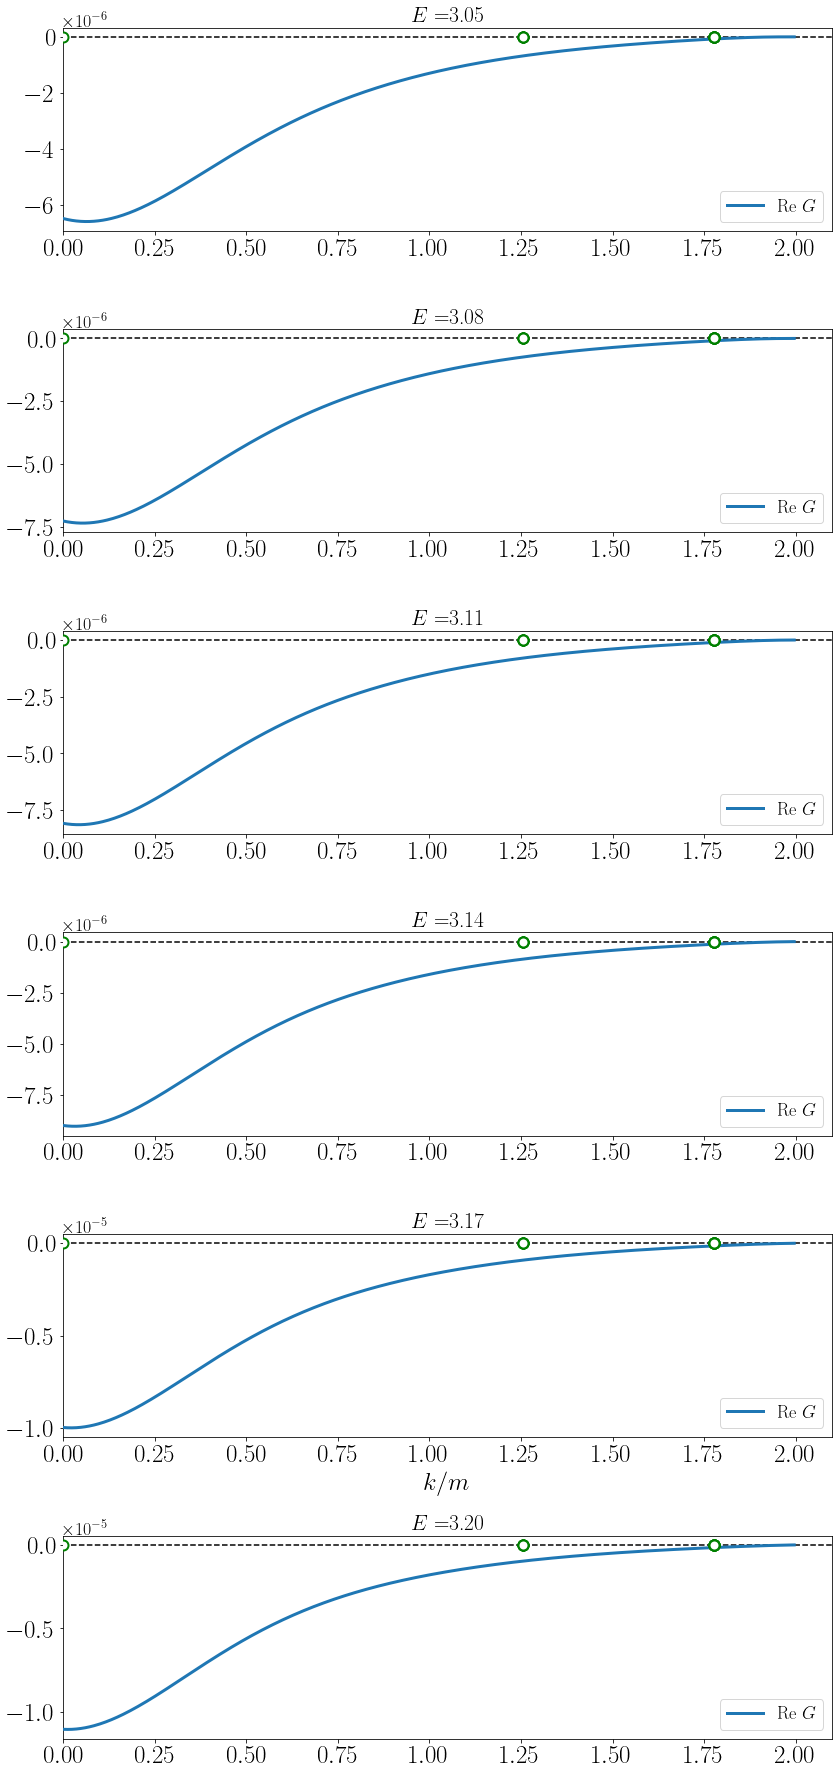

In [7]:
#Here we plot the Gij function for different spectator
#momenta k, we also plot the cutoff function to see upto 
#which momenta it provides support, along with the momenta 
#in lattice units 

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "Gmat_vs_sigk_En_3.050000_nP_100_np_100.dat"
filename2 = "Gmat_vs_sigk_En_3.080000_nP_100_np_100.dat"
filename3 = "Gmat_vs_sigk_En_3.110000_nP_100_np_100.dat"
filename4 = "Gmat_vs_sigk_En_3.140000_nP_100_np_100.dat"
filename5 = "Gmat_vs_sigk_En_3.170000_nP_100_np_100.dat"
filename6 = "Gmat_vs_sigk_En_3.200000_nP_100_np_100.dat"

p_in_lat_file = "p_in_lattice_unit.dat"

atmpi = 1#0.06906

titlelist = ["3.05","3.08","3.11","3.14","3.17","3.20"]
#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5, filename6]
fig,ax = plt.subplots(len(filelist),1,figsize=(12,25))
counter = 0

for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, kx, recutoff, imcutoff, reG, imG) = np.genfromtxt(filename, unpack=True)
    (rep, imp) = np.genfromtxt(p_in_lat_file, unpack=True)
    
    zero_y_val = []
    for i in range(len(rep)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)


    ax[counter].set_xlim(0,2.1)
    #ax[counter].set_ylim(-1E-17,1E-17)
    #ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$E = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(kx,reG, linewidth=3, zorder=4, label="Re $G$")
    #ax[counter].plot(kx,imG, linewidth=3, zorder=4,label="Im $G$")
    #ax[counter].plot(kx,recutoff, linewidth=3, zorder=4,label="$H(k)$")
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(rep,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].scatter(gpole1,zero_y_val1, marker='o', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)

    #ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$k/m$", fontsize=25)
    #ax[counter].set_ylabel("$G_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "Gmat_vs_k_nP_100_np_100.pdf"
plt.savefig(outputfile_str)
#plt.close()

#print(full_energy_list[0][1][2])

file loaded =  Gmat_vs_sigk_En_3.050000_nP_100_np_110.dat
file loaded =  Gmat_vs_sigk_En_3.080000_nP_100_np_110.dat
file loaded =  Gmat_vs_sigk_En_3.110000_nP_100_np_110.dat
file loaded =  Gmat_vs_sigk_En_3.140000_nP_100_np_110.dat
file loaded =  Gmat_vs_sigk_En_3.170000_nP_100_np_110.dat
file loaded =  Gmat_vs_sigk_En_3.200000_nP_100_np_110.dat


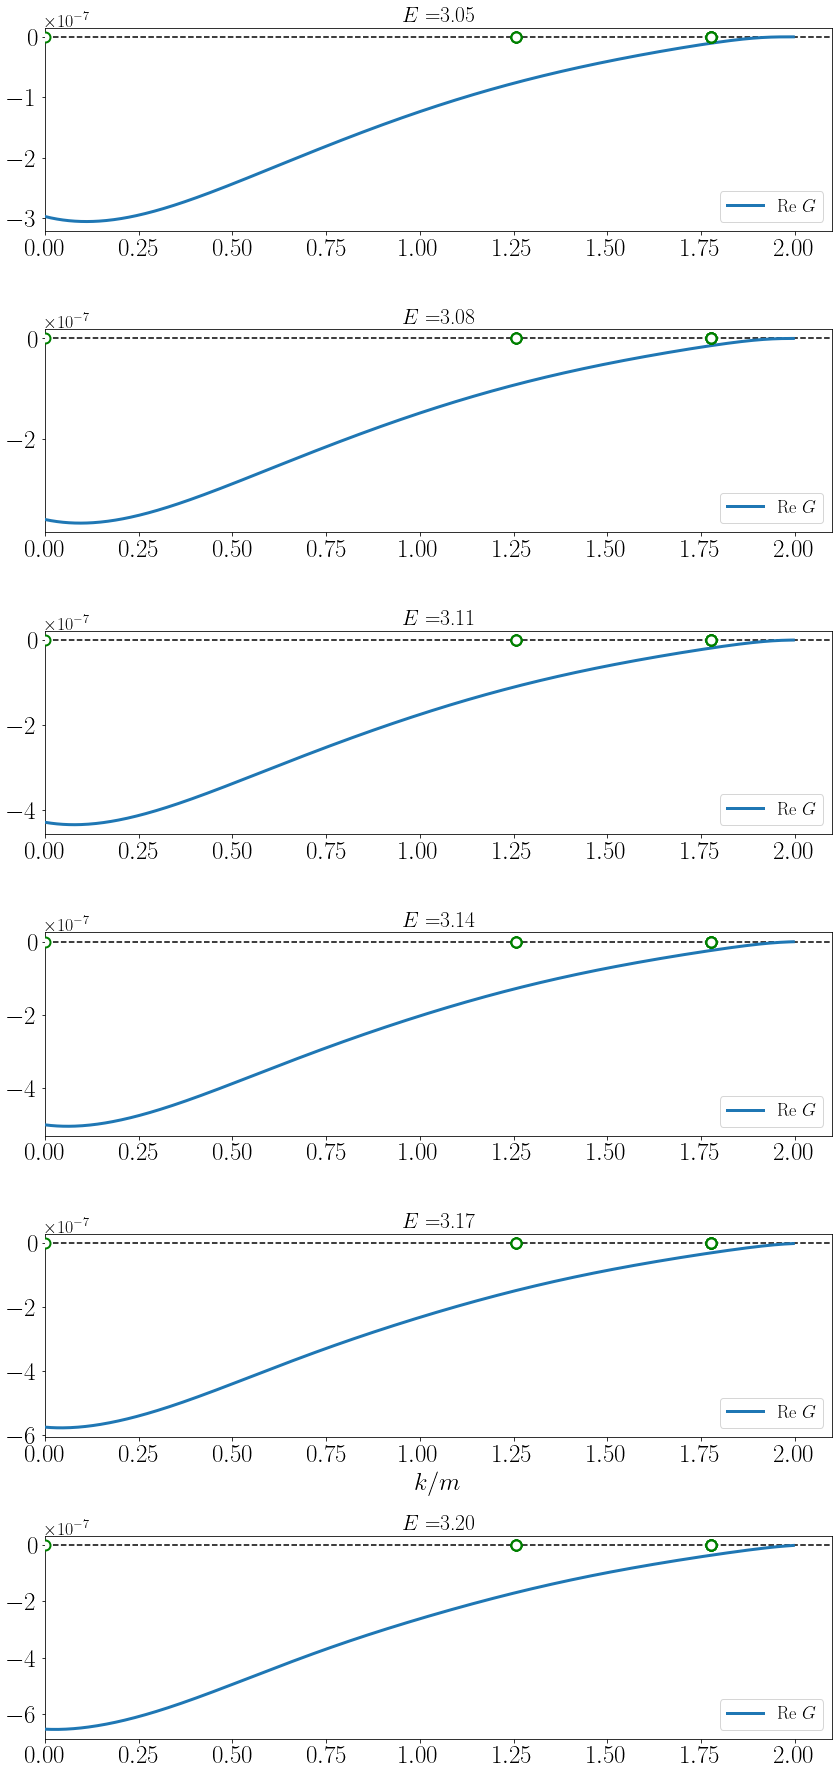

In [8]:
#Here we plot the Gij function for different spectator
#momenta k, we also plot the cutoff function to see upto 
#which momenta it provides support, along with the momenta 
#in lattice units 

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "Gmat_vs_sigk_En_3.050000_nP_100_np_110.dat"
filename2 = "Gmat_vs_sigk_En_3.080000_nP_100_np_110.dat"
filename3 = "Gmat_vs_sigk_En_3.110000_nP_100_np_110.dat"
filename4 = "Gmat_vs_sigk_En_3.140000_nP_100_np_110.dat"
filename5 = "Gmat_vs_sigk_En_3.170000_nP_100_np_110.dat"
filename6 = "Gmat_vs_sigk_En_3.200000_nP_100_np_110.dat"

p_in_lat_file = "p_in_lattice_unit.dat"

atmpi = 1#0.06906

titlelist = ["3.05","3.08","3.11","3.14","3.17","3.20"]
#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5, filename6]
fig,ax = plt.subplots(len(filelist),1,figsize=(12,25))
counter = 0

for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, kx, recutoff, imcutoff, reG, imG) = np.genfromtxt(filename, unpack=True)
    (rep, imp) = np.genfromtxt(p_in_lat_file, unpack=True)
    
    zero_y_val = []
    for i in range(len(rep)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)


    ax[counter].set_xlim(0,2.1)
    #ax[counter].set_ylim(-1E-17,1E-17)
    #ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$E = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(kx,reG, linewidth=3, zorder=4, label="Re $G$")
    #ax[counter].plot(kx,imG, linewidth=3, zorder=4,label="Im $G$")
    #ax[counter].plot(kx,recutoff, linewidth=3, zorder=4,label="$H(k)$")
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(rep,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].scatter(gpole1,zero_y_val1, marker='o', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)

    #ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$k/m$", fontsize=25)
    #ax[counter].set_ylabel("$G_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "Gmat_vs_k_nP_100_np_110.pdf"
plt.savefig(outputfile_str)
#plt.close()

#print(full_energy_list[0][1][2])

file loaded =  F3_ma=inf_KKpi_L20_nP_000.dat
file loaded =  F3_ma=inf_KKpi_L20_nP_001.dat
file loaded =  F3_ma=inf_KKpi_L20_nP_011.dat
file loaded =  F3_ma=inf_KKpi_L20_nP_111.dat
file loaded =  F3_ma=inf_KKpi_L20_nP_002.dat


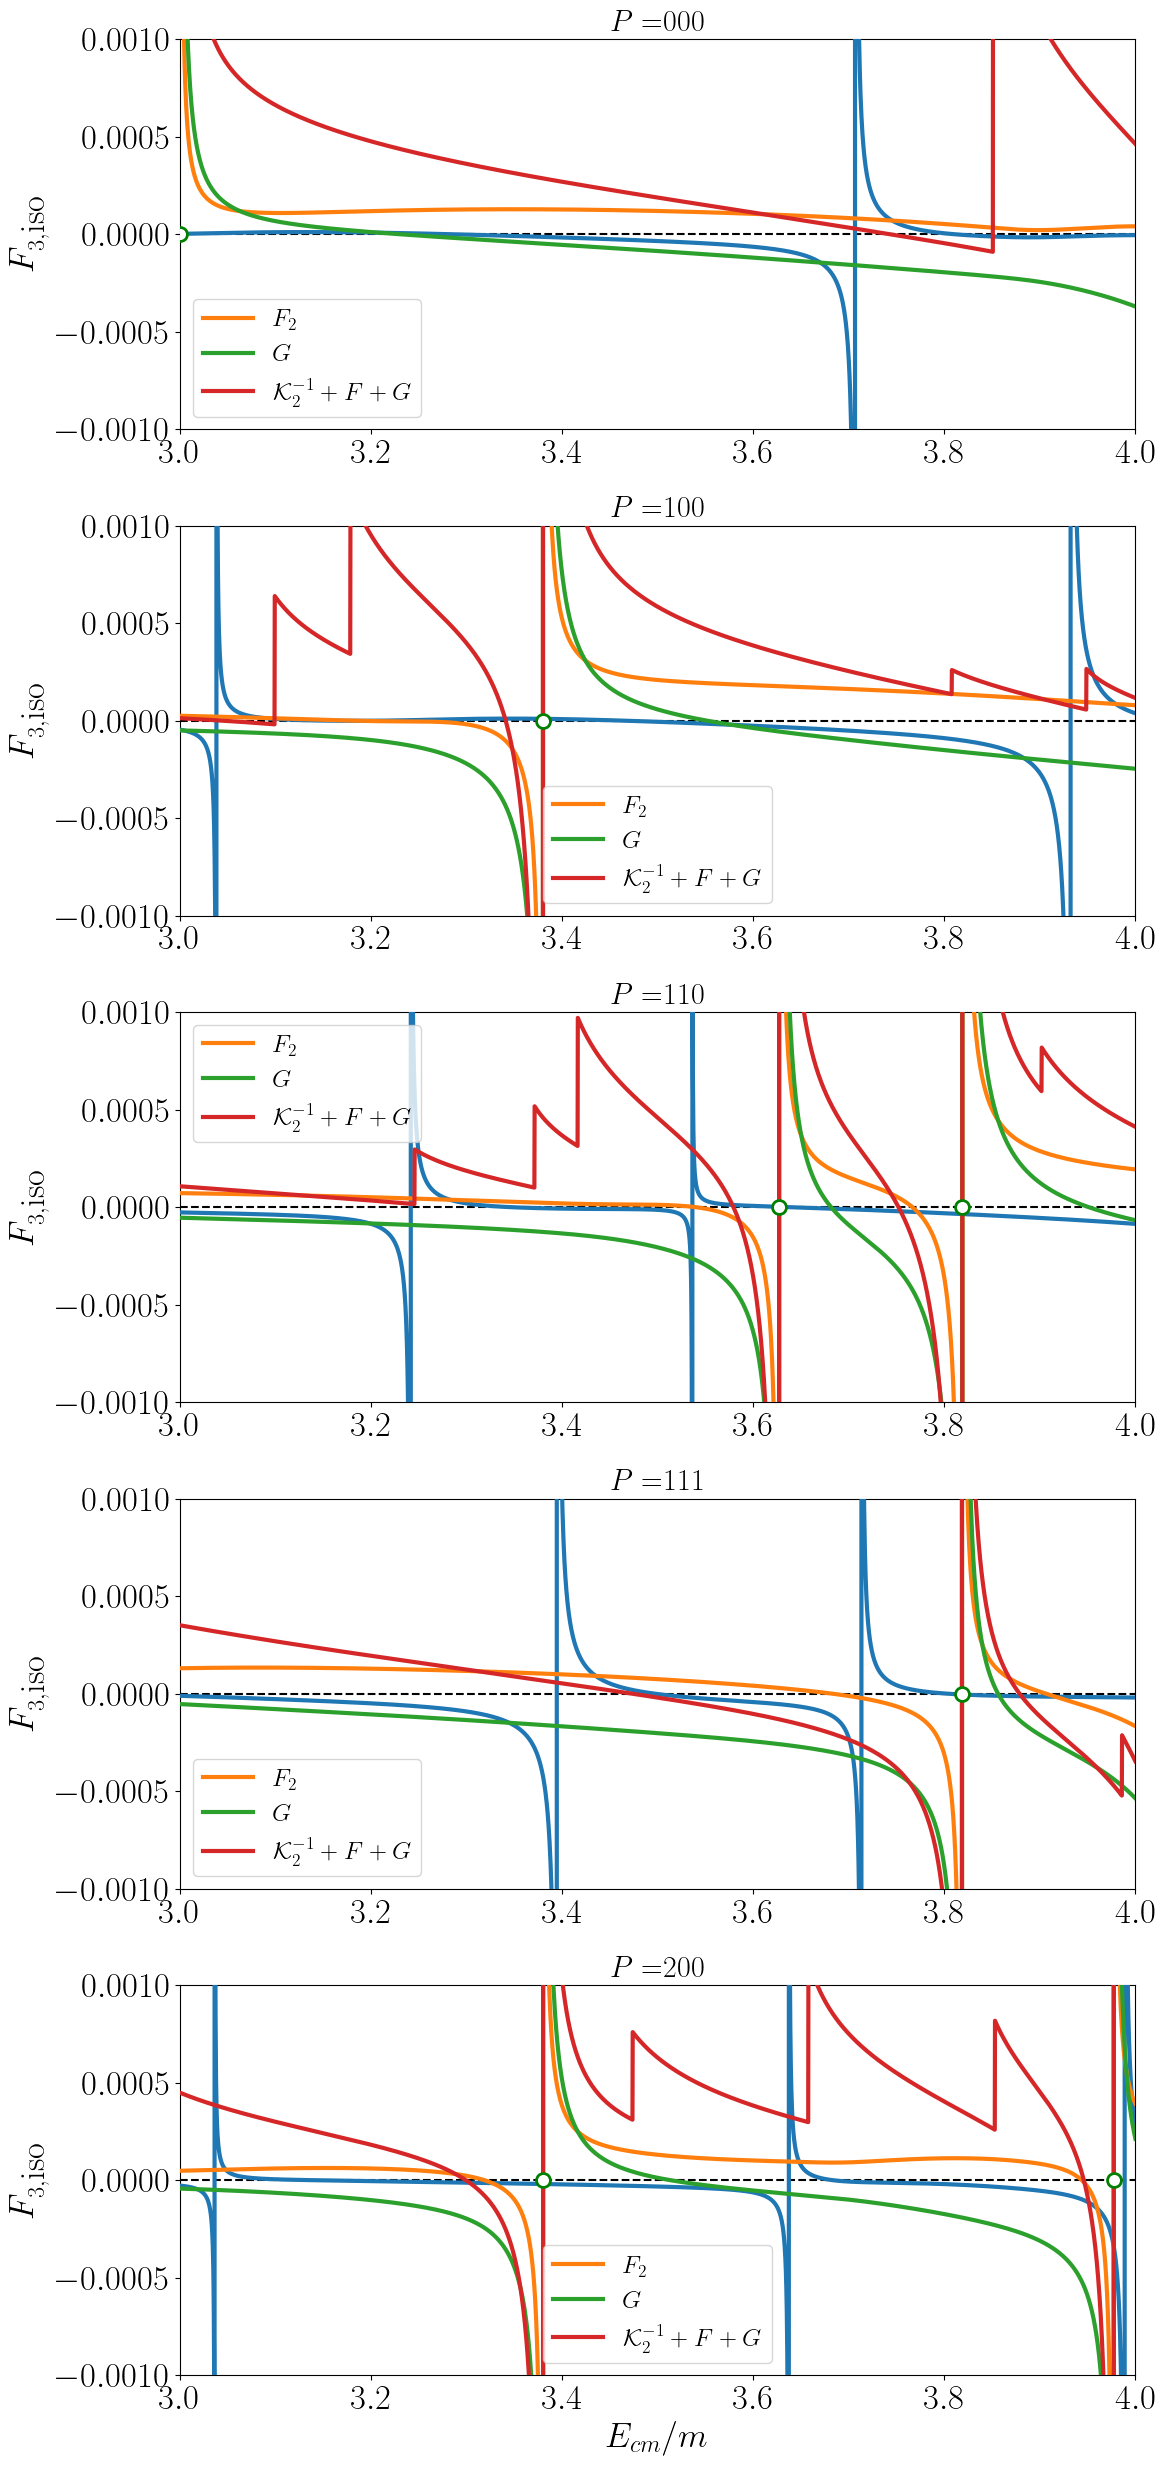

In [16]:
# Here we plot the F3 function for each boost frame and compare them with 
# free spectrum generated from threebody_non_int_spectrum() code 


#This plots F3_iso for different total momentum P

plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)
filename1 = "F3_ma=inf_KKpi_L20_nP_000.dat"
filename2 = "F3_ma=inf_KKpi_L20_nP_001.dat"
filename3 = "F3_ma=inf_KKpi_L20_nP_011.dat"
filename4 = "F3_ma=inf_KKpi_L20_nP_111.dat"
filename5 = "F3_ma=inf_KKpi_L20_nP_002.dat"

spectrum1 = "non_int_3body_nP000.dat"
spectrum2 = "non_int_3body_nP100.dat"
spectrum3 = "non_int_3body_nP110.dat"
spectrum4 = "non_int_3body_nP111.dat"
spectrum5 = "non_int_3body_nP200.dat"

Gpole1 = "Gpole_3body_nP000.dat"
Gpole2 = "Gpole_3body_nP100.dat"
Gpole3 = "Gpole_3body_nP110.dat"
Gpole4 = "Gpole_3body_nP111.dat"
Gpole5 = "Gpole_3body_nP200.dat"

atmpi = 1#0.06906

#raulF3file = "detF3inv_test_FRL_L5"
filelist = [filename1, filename2, filename3, filename4, filename5]
additionalpole_filelist = [spectrum1, spectrum2, spectrum3, spectrum4, spectrum5]
additionalpole_filelist1 = [Gpole1, Gpole2, Gpole3, Gpole4, Gpole5]
titlelist = ["000","100","110","111","200"]
fig,ax = plt.subplots(5,1,figsize=(12,25))
counter = 0
selected_irrep_list = ["000_A1m","100_A2","110_A2","111_A2","200_A2"]


for file in filelist:
    print("file loaded = ",file)
    filename = file 
    (En, EcmR, EcmI, F2, F2sum, G, Gsum, 
     K2iplusFplusG, K2i, F3det, F3iso) = np.genfromtxt(filename, unpack=True)

    additionalpole_file = additionalpole_filelist[counter] 
    additionalpole_file1 = additionalpole_filelist1[counter] 

    (EcmR1) = np.genfromtxt(additionalpole_file, unpack=True)
    (gpole1) = np.genfromtxt(additionalpole_file1, unpack=True)
    #here F3det1 and F3iso1 are the denom part multiplied with 1 vector on both sides 

    
    zero_y_val = []
    for i in range(len(EcmR1)):
        zero_y_val.append(0.0)
    
    np_zero_y_val = np.array(zero_y_val)

    zero_y_val1 = []
    for i in range(len(gpole1)):
        zero_y_val1.append(0.0)
    
    np_zero_y_val1 = np.array(zero_y_val1)

    ax[counter].set_xlim(3,4)
    #ax[counter].set_ylim(-1E-17,1E-17)
    ax[counter].set_ylim(-0.001,0.001)
    ax[counter].tick_params(axis='both', which='major', labelsize=25)
    ax[counter].tick_params(axis='both', which='minor', labelsize=25)
    #ax.set_yscale('log')
    #L = 6
    HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
    titlestring = "$P = $" + str(titlelist[counter])
    ax[counter].set_title(titlestring)
    ax[counter].plot(EcmR,F3iso, linewidth=3, zorder=4)
    ax[counter].plot(EcmR,F2sum, linewidth=3, zorder=4,label="$F_2$")
    ax[counter].plot(EcmR,Gsum, linewidth=3, zorder=4,label="$G$")
    ax[counter].plot(EcmR,K2iplusFplusG, linewidth=3, zorder=4,label="$\\mathcal{K}_2^{-1} + F+G$")
    
    #ax[counter].plot(EcmR1,F21sum, linewidth=3, label=str("$F_2$, ") + titlestring)
    #ax[counter].plot(EcmR1,F3iso1/10000000000, linewidth=4, color='red', label=HFGtitle, zorder=3)
    ax[counter].scatter(EcmR1,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
    #ax[counter].scatter(gpole1,zero_y_val1, marker='o', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].scatter(Ecm_int,np_zero_y_val2, marker='s', s=100, edgecolor="red", linewidth=2, facecolor='white',zorder=5)
    
    #ax[counter].plot(EcmR,Reqsq, linewidth=3, label="$q_{2,p}^2$")
    #ax[counter].plot(EcmR,Recutoff, linewidth=3, label="$H(p)$")
    #ax[counter].axvline(x=Recheckzero1[0],linestyle='--',color='red')
    #ax[counter].axvline(x=Recheckzero2[0],linestyle='--',color='green')
    #ax[counter].axvline(x=threshold[0],linestyle='--',color='black')
    ax[counter].axhline(y=0,linestyle='--',color='black',zorder=2)

    #ax[counter].axvline(x=0.37,linestyle='--',color='black',zorder=2)
    
    #ax.scatter(En, abs(detF3), marker='o', s=60, edgecolor="teal", facecolor='white',zorder=5, label="Digonto")
    #ax.scatter(En1, abs(detF31), marker='s', s=60,edgecolor="red", facecolor='white',zorder=3, label="FRL")
    
    ax[counter].legend()
    fig.tight_layout()
    ax[4].set_xlabel("$E_{cm}/m$", fontsize=25)
    ax[counter].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
    plt.draw()
    counter=counter+1


outputfile_str = "F3iso_ID_test_ma=inf.pdf"
plt.savefig(outputfile_str)
#plt.close()

#print(full_energy_list[0][1][2])

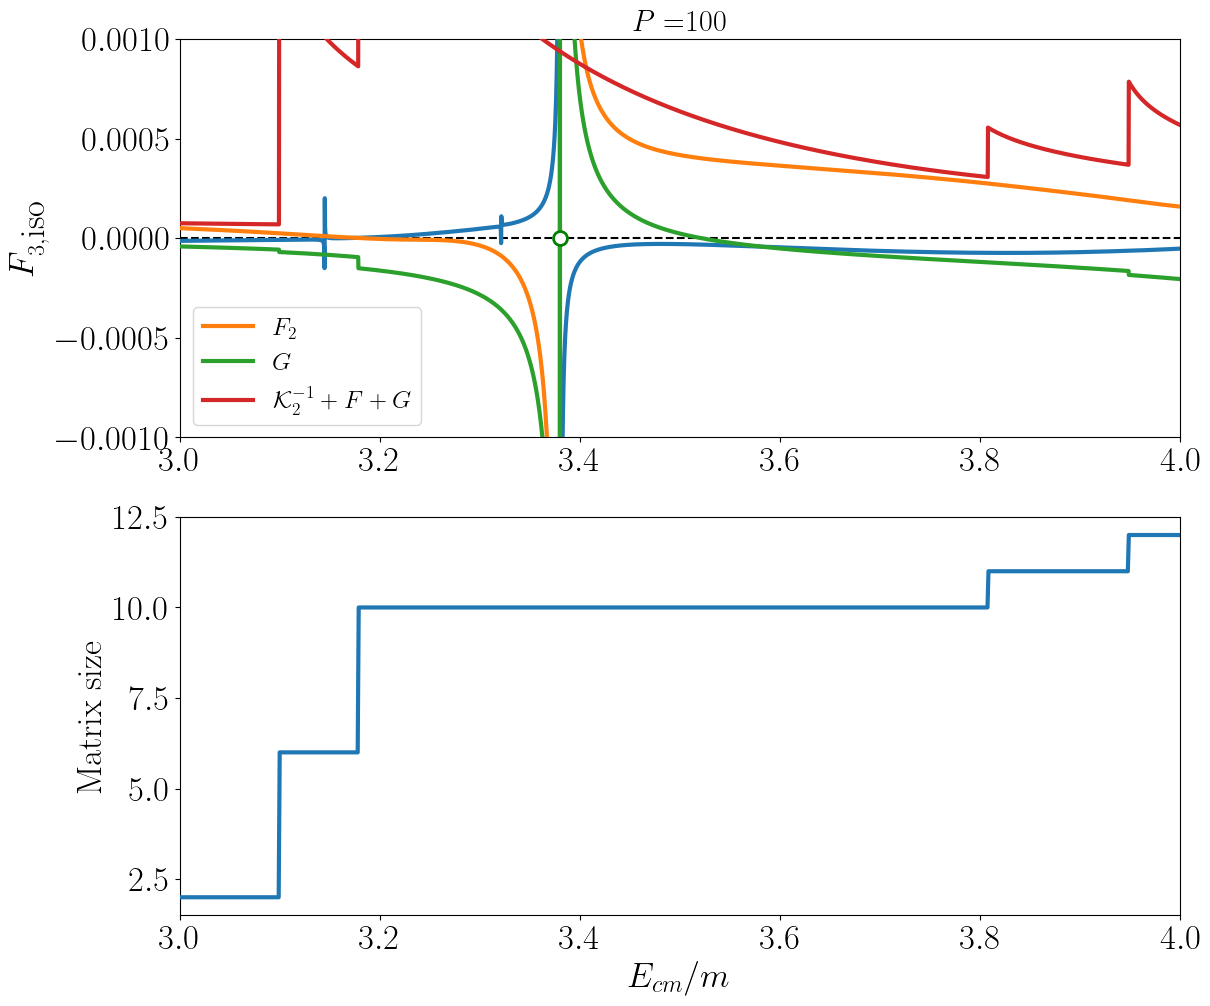

In [8]:
# Here we plot the F3 function for identical particles and check 
# why there is a branch cut like structure coming in Gmat, this might 
# be due to the momentum config we are selected, we plot the two side by side for 
# testing if the kinematic point where new shells are added coincide with the 
# the discontinuity of G 


plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

filename1 = "F3_ma=inf_KKpi_L20_nP_100.dat"
shellfile1 = "activated_shell_P_100.dat"

spectrum1 = "non_int_3body_nP100.dat"

Gpole1 = "Gpole_3body_nP100.dat"

atmpi = 1#0.06906

#raulF3file = "detF3inv_test_FRL_L5"
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0

(En, EcmR, EcmI, F2, F2sum, G, Gsum, 
     K2i, FplusG, F3det, F3iso) = np.genfromtxt(filename1, unpack=True)

(EcmAS, EnAS, maxnsq, maxn) = np.genfromtxt(shellfile1, unpack=True)
(EcmR1) = np.genfromtxt(spectrum1, unpack=True)
(gpole1) = np.genfromtxt(Gpole1, unpack=True)

zero_y_val = []
for i in range(len(EcmR1)):
    zero_y_val.append(0.0)
    
np_zero_y_val = np.array(zero_y_val)

zero_y_val1 = []
for i in range(len(gpole1)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax[0].set_xlim(3,4)
ax[1].set_xlim(3,4)
ax[0].set_ylim(-0.001,0.001)

ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[0].tick_params(axis='both', which='minor', labelsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25)
ax[1].tick_params(axis='both', which='minor', labelsize=25)
HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
titlestring = "$P = $" + str(100)
    
    
ax[0].set_title(titlestring)
ax[0].plot(EcmR,F3iso, linewidth=3, zorder=4)
ax[0].plot(EcmR,F2sum, linewidth=3, zorder=4,label="$F_2$")
ax[0].plot(EcmR,Gsum, linewidth=3, zorder=4,label="$G$")
ax[0].plot(EcmR,FplusG, linewidth=3, zorder=4,label="$\\mathcal{K}_2^{-1} + F+G$")
ax[0].scatter(EcmR1,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
ax[0].axhline(y=0,linestyle='--',color='black',zorder=2)

ax[1].plot(EcmAS,maxn, linewidth=3, zorder=4)
ax[0].legend()   
fig.tight_layout()
ax[1].set_xlabel("$E_{cm}/m$", fontsize=25)
ax[0].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
ax[1].set_ylabel("Matrix size",fontsize=25)

plt.draw()


outputfile_str = "check_shells_P100.pdf"
plt.savefig(outputfile_str)
#plt.close()

#print(full_energy_list[0][1][2])

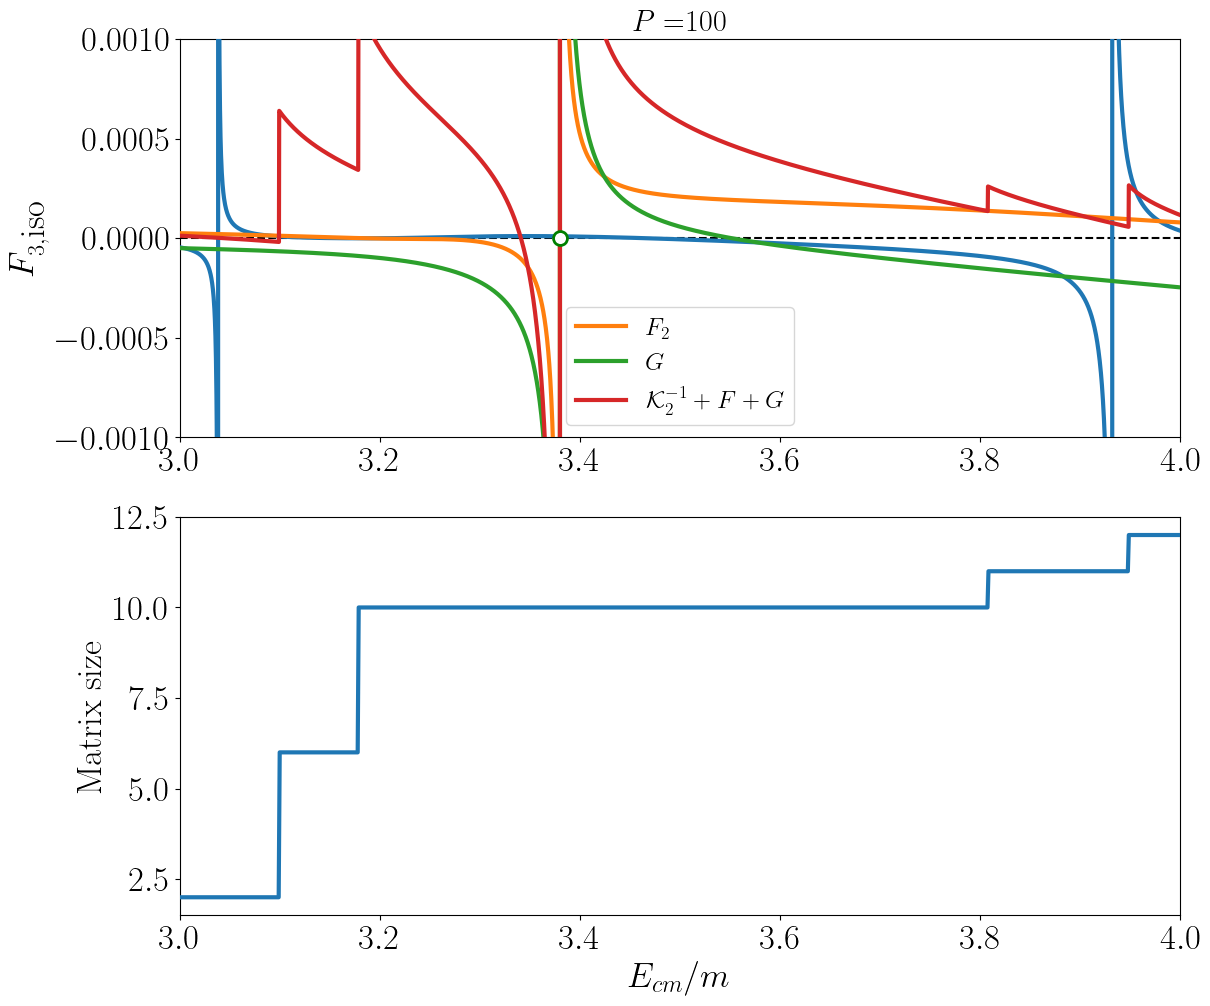

In [17]:
# Here we plot the F3 function for identical particles and check 
# why there is a branch cut like structure coming in Gmat, this might 
# be due to the momentum config we are selected, we plot the two side by side for 
# testing if the kinematic point where new shells are added coincide with the 
# the discontinuity of G 


plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

filename1 = "F3_ma=inf_KKpi_L20_nP_001.dat"
shellfile1 = "activated_shell_P_001.dat"

spectrum1 = "non_int_3body_nP100.dat"

Gpole1 = "Gpole_3body_nP100.dat"

atmpi = 1#0.06906

#raulF3file = "detF3inv_test_FRL_L5"
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0

(En, EcmR, EcmI, F2, F2sum, G, Gsum, 
     FplusG, K2i, F3det, F3iso) = np.genfromtxt(filename1, unpack=True)

(EcmAS, EnAS, maxnsq, maxn) = np.genfromtxt(shellfile1, unpack=True)
(EcmR1) = np.genfromtxt(spectrum1, unpack=True)
(gpole1) = np.genfromtxt(Gpole1, unpack=True)

zero_y_val = []
for i in range(len(EcmR1)):
    zero_y_val.append(0.0)
    
np_zero_y_val = np.array(zero_y_val)

zero_y_val1 = []
for i in range(len(gpole1)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax[0].set_xlim(3,4)
ax[1].set_xlim(3,4)
ax[0].set_ylim(-0.001,0.001)

ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[0].tick_params(axis='both', which='minor', labelsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25)
ax[1].tick_params(axis='both', which='minor', labelsize=25)
HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
titlestring = "$P = $" + str(100)
    
    
ax[0].set_title(titlestring)
ax[0].plot(EcmR,F3iso, linewidth=3, zorder=4)
ax[0].plot(EcmR,F2sum, linewidth=3, zorder=4,label="$F_2$")
ax[0].plot(EcmR,Gsum, linewidth=3, zorder=4,label="$G$")
ax[0].plot(EcmR,FplusG, linewidth=3, zorder=4,label="$\\mathcal{K}_2^{-1} + F+G$")
ax[0].scatter(EcmR1,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
ax[0].axhline(y=0,linestyle='--',color='black',zorder=2)

ax[1].plot(EcmAS,maxn, linewidth=3, zorder=4)
ax[0].legend()   
fig.tight_layout()
ax[1].set_xlabel("$E_{cm}/m$", fontsize=25)
ax[0].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
ax[1].set_ylabel("Matrix size",fontsize=25)

plt.draw()


outputfile_str = "check_shells_P001.pdf"
plt.savefig(outputfile_str)
#plt.close()

#print(full_energy_list[0][1][2])

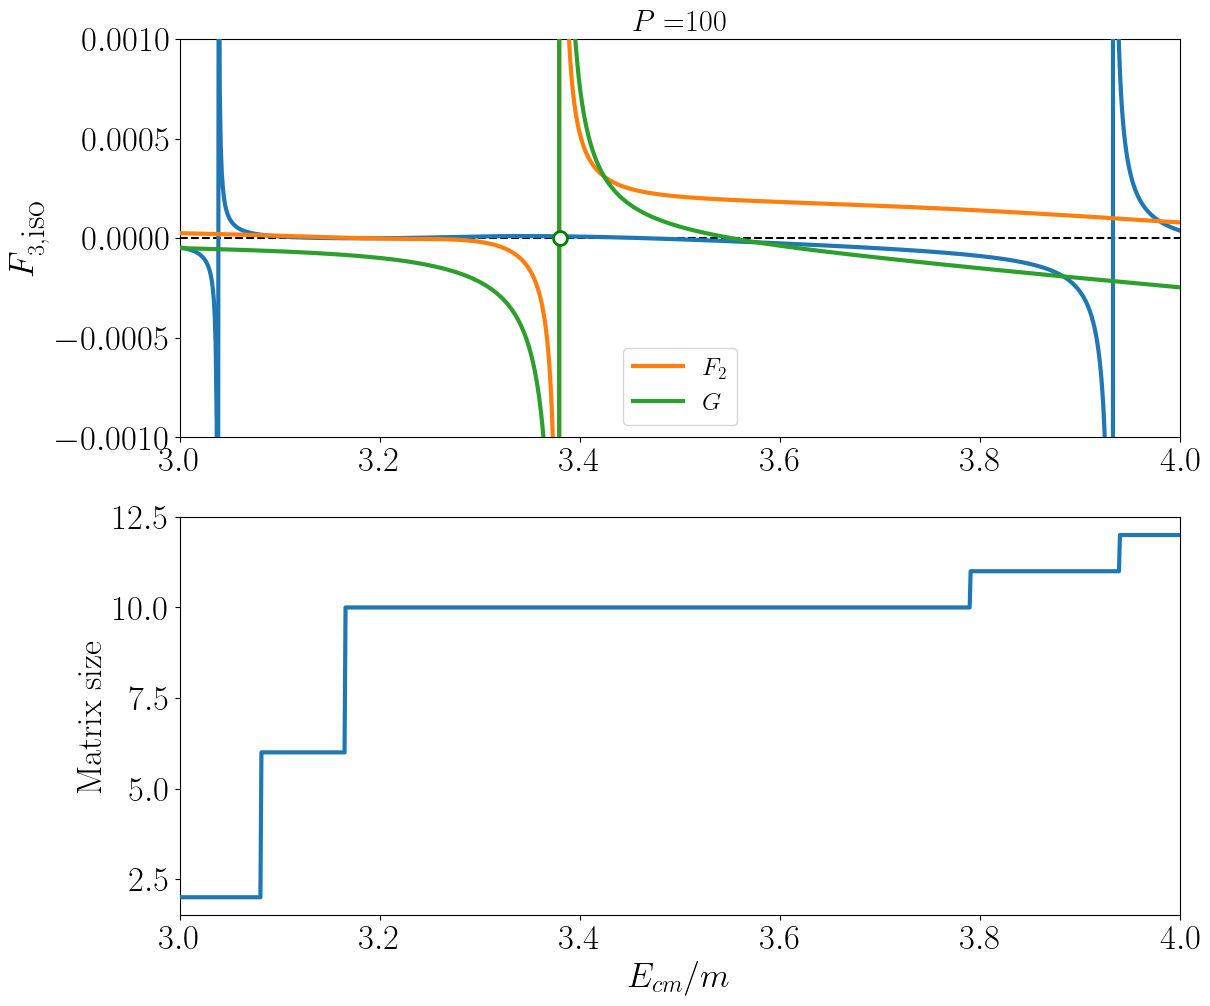

In [14]:
# This is from FRL code
# Here we plot the F3 function for identical particles and check 
# why there is a branch cut like structure coming in Gmat, this might 
# be due to the momentum config we are selected, we plot the two side by side for 
# testing if the kinematic point where new shells are added coincide with the 
# the discontinuity of G 


plt.rcParams.update({'font.size': 18})
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rc('text', usetex=True)

filename1 = "F3_FRL_L5_P001.dat"
shellfile1 = "activated_shell_P_001.dat"

spectrum1 = "non_int_3body_nP100.dat"

Gpole1 = "Gpole_3body_nP100.dat"

atmpi = 1#0.06906

#raulF3file = "detF3inv_test_FRL_L5"
fig,ax = plt.subplots(2,1,figsize=(12,10))
counter = 0

(En, EcmR, Matsize, F2, G, 
     K2i, F3det, F3iso) = np.genfromtxt(filename1, unpack=True)

#(EcmAS, EnAS, maxnsq, maxn) = np.genfromtxt(shellfile1, unpack=True)
(EcmR1) = np.genfromtxt(spectrum1, unpack=True)
#(gpole1) = np.genfromtxt(Gpole1, unpack=True)

zero_y_val = []
for i in range(len(EcmR1)):
    zero_y_val.append(0.0)
    
np_zero_y_val = np.array(zero_y_val)

zero_y_val1 = []
for i in range(len(gpole1)):
    zero_y_val1.append(0.0)
    
np_zero_y_val1 = np.array(zero_y_val1)

ax[0].set_xlim(3,4)
ax[1].set_xlim(3,4)
ax[0].set_ylim(-0.001,0.001)

ax[0].tick_params(axis='both', which='major', labelsize=25)
ax[0].tick_params(axis='both', which='minor', labelsize=25)
ax[1].tick_params(axis='both', which='major', labelsize=25)
ax[1].tick_params(axis='both', which='minor', labelsize=25)
HFGtitle = "$(\mathcal{K}_2^{-1} + F_2 + G)^{-1}$"
titlestring = "$P = $" + str(100)
    
    
ax[0].set_title(titlestring)
ax[0].plot(EcmR,F3iso, linewidth=3, zorder=4)
ax[0].plot(EcmR,F2, linewidth=3, zorder=4,label="$F_2$")
ax[0].plot(EcmR,G, linewidth=3, zorder=4,label="$G$")
#ax[0].plot(EcmR,FplusG, linewidth=3, zorder=4,label="$\\mathcal{K}_2^{-1} + F+G$")
ax[0].scatter(EcmR1,zero_y_val, marker='o', s=100, edgecolor="green", linewidth=2, facecolor='white',zorder=5)
ax[0].axhline(y=0,linestyle='--',color='black',zorder=2)

ax[1].plot(EcmR, Matsize, linewidth=3, zorder=4)
ax[0].legend()   
fig.tight_layout()
ax[1].set_xlabel("$E_{cm}/m$", fontsize=25)
ax[0].set_ylabel("$F_{3,\\textrm{iso}}$",fontsize=25)
ax[1].set_ylabel("Matrix size",fontsize=25)

plt.draw()


outputfile_str = "FRL_check_shells_P001.pdf"
plt.savefig(outputfile_str)
#plt.close()

#print(full_energy_list[0][1][2])